# cygnus


In [2]:
from importlib import reload
from matplotlib import colormaps
from utils import plots, stats, tables, utils

In [91]:
# Knobs
base_dir = '/u/cmolder/GitHub/ChampSim/out/pythia/'
suites = [
    #('spec06', 'one_phase'),
    ('spec06', 'weighted'),
    #('gap', 'one_phase'),
    #('google', 'one_phase')
]
metrics  = [
    'ipc_improvement',
    'L2C_pf_issued',
]
features = [
    {'Delta_Path', 'PC_Delta'}, 
    {'PC'}, 
    {'PC_Delta'}, 
    {'Delta_Path'}, 
    {'Global'}
]
features_sumpool = [
    {'PC', 'Delta_Path'},
    {'PC', 'PC_Delta'},
    {'PC', 'Delta_Path', 'PC_Delta'},
    {'Global', 'Delta_Path', 'PC_Delta'},
    {'Global', 'PC', 'PC_Delta'},
    {'Global', 'PC', 'Delta_Path'},
    {'Global', 'PC', 'PC_Delta', 'Delta_Path'},
]

baselines = ['bo', 'spp_dev2', 'bingo', 'next_line', 'ip_stride']
dpi = 150
cmaps = {
    'Pythia': colormaps['Blues'],
    'Pythia-Ignore': colormaps['Purples'],
    'Bythio': colormaps['Reds'],
    'Bythio-Ignore': colormaps['Greens'],
}

# Plots (suites)

In [92]:
reload(tables)
reload(utils)
dfs = {
    # ===
    # ===== Baseline models =====
    # ===
    'degree1/baseline': tables.load_stats_csv(
        base_dir, 'degree1/baseline.csv', baselines, prefetchers_level='l2'),

    'degree1/pythia/vanilla': tables.load_stats_csv_pythia(
        base_dir, 'degree1/pythia/vanilla.csv', features),

    'degree1/fixed_offset/vanilla': tables.load_stats_csv_next_line(
        base_dir, 'degree1/fixed_offset/vanilla.csv'),

    'degreedyn/baseline': tables.load_stats_csv(
        base_dir, 'degreedyn/baseline.csv', ['spp_dev2', 'spp_ppf_dev', 'bingo'], prefetchers_level='l2'),

    # ===
    # ===== "Fair" models ===== (No action fallback, no zero-offset action)
    # ===
    'degree1/pythia/nozeroaction': tables.load_stats_csv_pythia(
        base_dir, 'degree1/pythia/nozeroaction.csv', 
        features + features_sumpool),

    'degree1/pythia/nozeroaction_demandfill': tables.load_stats_csv_pythia(
        base_dir, 'degree1/pythia/nozeroaction_demandfill.csv', 
        features),

    'degree1/bythio/nozeroaction': tables.load_stats_csv_pythia(
        base_dir, 'degree1/bythio/nozeroaction.csv', 
        features + features_sumpool, feature_key='bythio_features'),

    'degree1/bo/fallback': tables.load_stats_csv(
        base_dir, 'degree1/bo/fallback.csv',
        ['bo'], prefetchers_level='l2'),

    'degree1/bo/nozeroaction': tables.load_stats_csv(
        base_dir, 'degree1/bo/nozeroaction.csv',
        ['bo'], prefetchers_level='l2'),

    'degree1/bo/nozeroaction_pythiaactions_256rr': tables.load_stats_csv(
        base_dir, 'degree1/bo/nozeroaction_pythiaactions_256rr.csv', 
        ['bo'], prefetchers_level='l2'),

    'degree1/bo/nozeroaction_pythiaactions_256rr_simultaneous': tables.load_stats_csv(
        base_dir, 'degree1/bo/nozeroaction_pythiaactions_256rr_simultaneous.csv', 
        ['bo'], prefetchers_level='l2'),

    'degree1/bythio/nozeroaction_ignorequeued': tables.load_stats_csv_pythia(
        base_dir, 'degree1/bythio/nozeroaction_ignorequeued.csv', 
        features + features_sumpool, feature_key='bythio_features'),

    'degree1/bythio/nozeroaction_prefetchfill': tables.load_stats_csv_pythia(
        base_dir, 'degree1/bythio/nozeroaction_prefetchfill.csv', 
        features, feature_key='bythio_features'),

    'degree1/bythio/nozeroaction_prefetchfill_ignorequeued': tables.load_stats_csv_pythia(
        base_dir, 'degree1/bythio/nozeroaction_prefetchfill_ignorequeued.csv', 
        features, feature_key='bythio_features'),

    'degree1/bythio/nozeroaction_pythialike': tables.load_stats_csv_pythia(
        base_dir, 'degree1/bythio/nozeroaction_pythialike.csv', 
        features, feature_key='bythio_features'),

    'degree1/bythio/nozeroaction_pythialike_ignorequeued': tables.load_stats_csv_pythia(
        base_dir, 'degree1/bythio/nozeroaction_pythialike_ignorequeued.csv', 
        features, feature_key='bythio_features'),
   
    'degree1/bythio/nozeroaction_pythialike_demandfill': tables.load_stats_csv_pythia(
        base_dir, 'degree1/bythio/nozeroaction_pythialike_demandfill.csv', 
        features, feature_key='bythio_features'),

    'degreedyn/pythia/nozeroaction': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/pythia/nozeroaction.csv', 
        features),

    'degreedyn/bythio/nozeroaction': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/bythio/nozeroaction.csv', 
        features, feature_key='bythio_features'),

    'degreedyn/bythio/nozeroaction_ignorequeued': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/bythio/nozeroaction_ignorequeued.csv', 
        features, feature_key='bythio_features'),

    'degreedyn/bythio/nozeroaction_pythialike': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/bythio/nozeroaction_pythialike.csv', 
        features, feature_key='bythio_features'),

    'degreedyn/bythio/nozeroaction_pythialike_ignorequeued': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/bythio/nozeroaction_pythialike_ignorequeued.csv', 
        features, feature_key='bythio_features'),

    'degree1/pythia/nozeroaction_sumpool': tables.load_stats_csv_pythia(
        base_dir, 'degree1/pythia/nozeroaction_sumpool.csv', 
        [{'Delta_Path', 'PC_Delta'}] + features_sumpool),

    'degree1/bythio/nozeroaction_sumpool': tables.load_stats_csv_pythia(
        base_dir, 'degree1/bythio/nozeroaction_sumpool.csv', 
        [{'Delta_Path', 'PC_Delta'}] + features_sumpool,
        feature_key='bythio_features'),

    'degree1/bythio/nozeroaction_ignorequeued_sumpool': tables.load_stats_csv_pythia(
        base_dir, 'degree1/bythio/nozeroaction_ignorequeued_sumpool.csv', 
        [{'Delta_Path', 'PC_Delta'}] + features_sumpool,
        feature_key='bythio_features'),
}

## Degree-1

### Baselines

Take every model in its vanilla formulation
- Pythia/Cygnus:
    - Action fallback
    - Zero-offset action
- BO:
    - No action fallback
    - Zero-offset action

In [ ]:
baseline_df = {
    'Pythia (PC_Delta, Delta_Path)': dfs['degree1/pythia/vanilla']['Delta_Path, PC_Delta'],
    'Pythia (PC)': dfs['degree1/pythia/vanilla']['PC'],
    #'Pythia (Stateless)': dfs['degree1/pythia/vanilla']['Global'],
    'BO': dfs['degree1/baseline']['bo'],
    'IP-Stride': dfs['degree1/baseline']['ip_stride'],
}
baseline_colors = {
    'Pythia (PC_Delta, Delta_Path)': 'C0',
    'Pythia (PC)': 'C9',
    'Pythia (Stateless)': 'C8',
    'Cygnus': 'C1',
    'BO': 'C2',
}

plots.plot_everything(baseline_df, suites=suites, metrics=metrics, colors=baseline_colors,
                      dpi=192, figsize=(12,5))

### Fair baselines

Make baseline comparisons fairer by removing tweaks to improve performance.
- Pythia/Cygnus:
    - **No** action fallback
    - **No** zero-offset action
- BO:
    - No action fallback
    - **No** zero-offset action

In [26]:
reload(stats)
fair_baseline_df = {
    'Pythia (PC_Delta, Delta_Path)': dfs['degree1/pythia/nozeroaction']['Delta_Path, PC_Delta'],
    'Pythia (PC)': dfs['degree1/pythia/nozeroaction']['PC'],
    'Pythia (Stateless)': dfs['degree1/pythia/nozeroaction']['Global'],
    
    'Pythia-Ignore (PC_Delta, Delta_Path)': dfs['degree1/bythio/nozeroaction_pythialike_ignorequeued']['Delta_Path, PC_Delta'],
    'Pythia-Ignore (PC)': dfs['degree1/bythio/nozeroaction_pythialike_ignorequeued']['PC'],
    'Pythia-Ignore (Stateless)': dfs['degree1/bythio/nozeroaction_pythialike_ignorequeued']['Global'],

    'Bythio-Ignore (PC_Delta, Delta_Path)' : dfs['degree1/bythio/nozeroaction_ignorequeued']['Delta_Path, PC_Delta'],
    'Bythio-Ignore (PC)': dfs['degree1/bythio/nozeroaction_ignorequeued']['PC'],
    'Bythio-Ignore (Stateless)': dfs['degree1/bythio/nozeroaction_ignorequeued']['Global'],

    'Bythio (PC_Delta, Delta_Path)' : dfs['degree1/bythio/nozeroaction']['Delta_Path, PC_Delta'],
    'Bythio (PC)': dfs['degree1/bythio/nozeroaction']['PC'],
    'Bythio (Stateless)': dfs['degree1/bythio/nozeroaction']['Global'],

    'BO-Adjusted': dfs['degree1/bo/nozeroaction_pythiaactions_256rr']['bo'],
    #'BO': dfs['degree1_featureless_nozeroaction']['bo'],
    #'BO-Adjusted+Simultaneous': dfs['degree1_bo_nozeroaction/pythiaactions_256rr_simultaneous']['bo'],
    
    #'BFO': dfs['degree1_fixed_offset']['best'],
    #'IP-Stride': dfs['degree1/baseline']['ip_stride'],
    #'Next-line': dfs['degree1/baseline']['next_line'],
}

fair_baseline_colors = {
    'Pythia (PC_Delta, Delta_Path)': cmaps['Pythia'](0.4),
    'Pythia (Delta_Path)': cmaps['Pythia'](0.5),
    'Pythia (PC)': cmaps['Pythia'](0.6),
    'Pythia (Stateless)': cmaps['Pythia'](0.7),

    'Pythia-Ignore (PC_Delta, Delta_Path)':  cmaps['Pythia-Ignore'](0.4),
    'Pythia-Ignore (Delta_Path)': cmaps['Pythia-Ignore'](0.5),
    'Pythia-Ignore (PC)':  cmaps['Pythia-Ignore'](0.6),
    'Pythia-Ignore (Stateless)':  cmaps['Pythia-Ignore'](0.7),

    'Bythio-Ignore (PC_Delta, Delta_Path)': cmaps['Bythio-Ignore'](0.4),
    'Bythio-Ignore (Delta_Path)': cmaps['Bythio-Ignore'](0.5),
    'Bythio-Ignore (PC)': cmaps['Bythio-Ignore'](0.6),
    'Bythio-Ignore (Stateless)': cmaps['Bythio-Ignore'](0.7),

    'Bythio (PC_Delta, Delta_Path)': cmaps['Bythio'](0.4),
    'Bythio (Delta_Path)': cmaps['Bythio'](0.5),
    'Bythio (PC)': cmaps['Bythio'](0.6),
    'Bythio (Stateless)': cmaps['Bythio'](0.7),

    'BO-Adjusted': 'darkgoldenrod',
    'BO': 'goldenrod',
}

legend_kwargs = {
    'fontsize': 5,
    'ncol': 5,
}

=== spec06 weighted ===


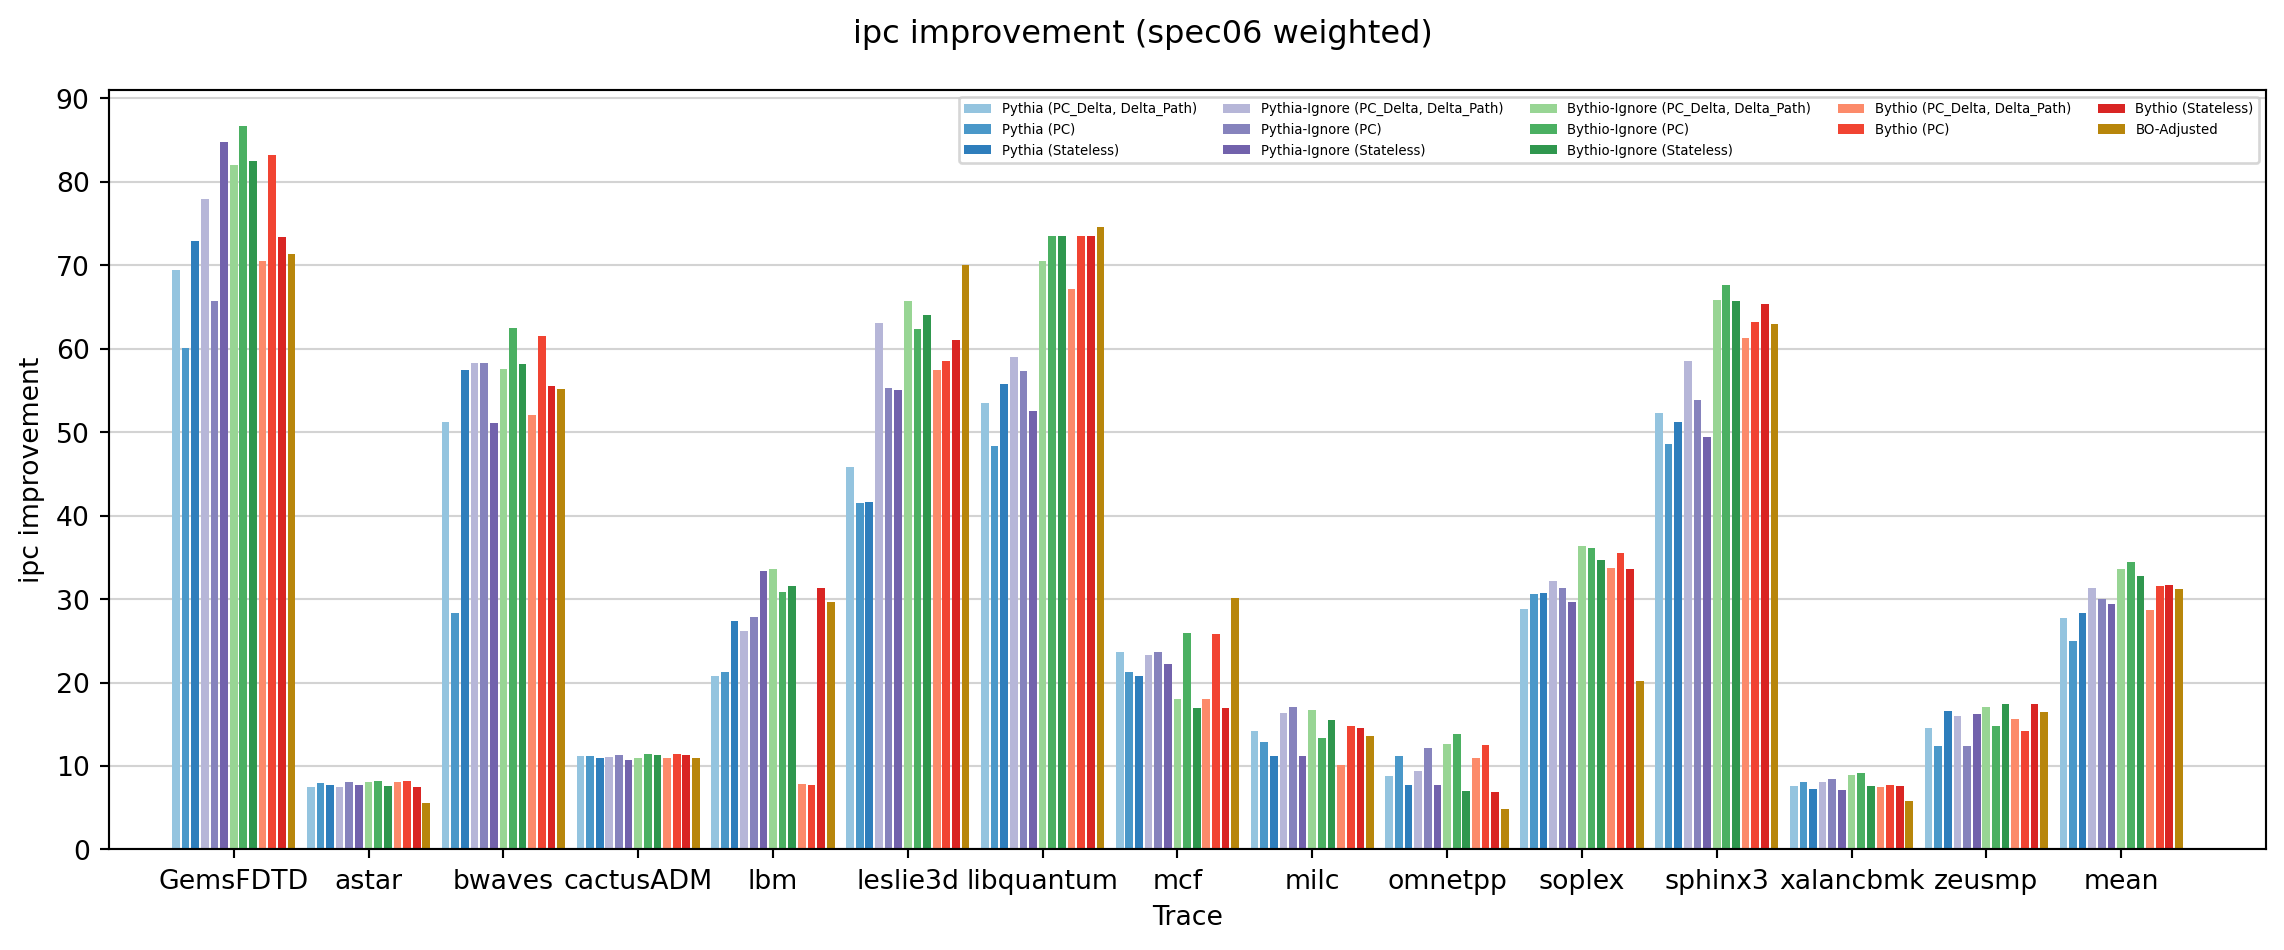

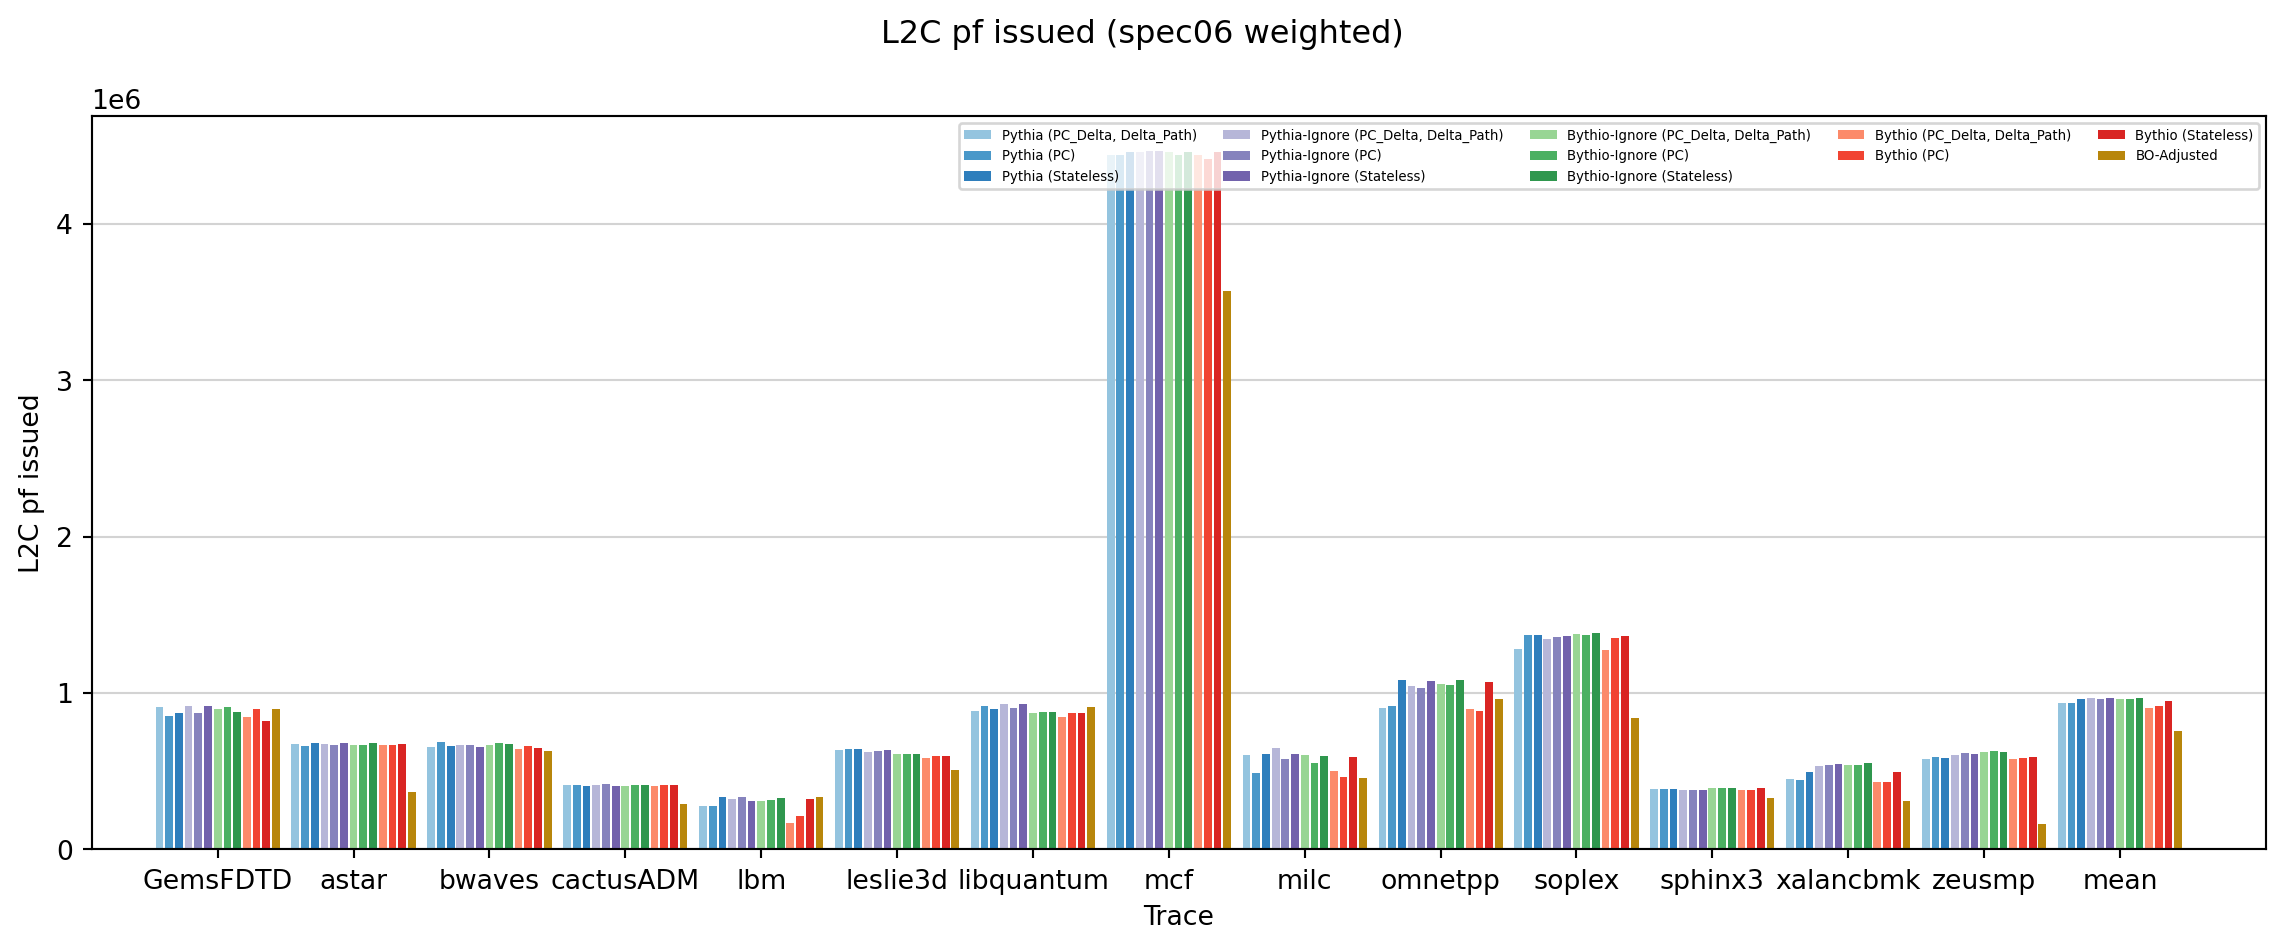

In [27]:
plots.plot_everything(fair_baseline_df, suites=suites, metrics=metrics, colors=fair_baseline_colors,
                      legend_kwargs=legend_kwargs, dpi=192, figsize=(12,5))

In [ ]:
reload(plots)
plots.plot_everything_accuracy(fair_baseline_df, suites=suites, level='L2C', colors=fair_baseline_colors,
                               legend_kwargs=legend_kwargs, dpi=192, figsize=(12,5))

In [ ]:
reload(plots)
plots.plot_everything_coverage(fair_baseline_df, suites=suites, level='L2C', colors=fair_baseline_colors,
                               legend_kwargs=legend_kwargs, dpi=192, figsize=(12,5))

### Features

In [24]:
reload(stats)
features_df = {
    #'Pythia (PC_Delta, Delta_Path)': dfs['degree1/pythia/nozeroaction']['Delta_Path, PC_Delta'],
    # 'Pythia (PC)': dfs['degree1/pythia/nozeroaction']['PC'],
    # 'Pythia (PC_Delta)': dfs['degree1/pythia/nozeroaction']['PC_Delta'],
    # 'Pythia (Delta_Path)': dfs['degree1/pythia/nozeroaction']['Delta_Path'],
    # 'Pythia (Stateless)': dfs['degree1/pythia/nozeroaction']['Global'],
    
    'Pythia-Ignore (PC_Delta, Delta_Path)': dfs['degree1/bythio/nozeroaction_pythialike_ignorequeued']['Delta_Path, PC_Delta'],
    'Pythia-Ignore (PC)': dfs['degree1/bythio/nozeroaction_pythialike_ignorequeued']['PC'],
    'Pythia-Ignore (PC_Delta)': dfs['degree1/bythio/nozeroaction_pythialike_ignorequeued']['PC_Delta'],
    'Pythia-Ignore (Delta_Path)': dfs['degree1/bythio/nozeroaction_pythialike_ignorequeued']['Delta_Path'],
    'Pythia-Ignore (Stateless)': dfs['degree1/bythio/nozeroaction_pythialike_ignorequeued']['Global'],

    'Cygnus-Ignore (PC_Delta, Delta_Path)' : dfs['degree1/bythio/nozeroaction_ignorequeued']['Delta_Path, PC_Delta'],
    'Cygnus-Ignore (PC)': dfs['degree1/bythio/nozeroaction_ignorequeued']['PC'],
    'Cygnus-Ignore (PC_Delta)': dfs['degree1/bythio/nozeroaction_ignorequeued']['PC_Delta'],
    'Cygnus-Ignore (Delta_Path)': dfs['degree1/bythio/nozeroaction_ignorequeued']['Delta_Path'],
    'Cygnus-Ignore (Stateless)': dfs['degree1/bythio/nozeroaction_ignorequeued']['Global'],

    # 'Bythio (PC)': dfs['degree1/bythio/nozeroaction']['PC']

    #'BO-Adjusted': dfs['degree1/bo/nozeroaction_pythiaactions_256rr']['bo'],
}

features_colors = {
    'Pythia (PC_Delta, Delta_Path)': cmaps['Pythia'](0.4),
    'Pythia (PC)': cmaps['Pythia'](0.5),
    'Pythia (PC_Delta)': cmaps['Pythia'](0.6),
    'Pythia (Delta_Path)': cmaps['Pythia'](0.7),
    'Pythia (Stateless)': cmaps['Pythia'](0.8),

    'Pythia-Ignore (PC_Delta, Delta_Path)':  cmaps['Pythia-Ignore'](0.4),
    'Pythia-Ignore (PC)':  cmaps['Pythia-Ignore'](0.5),
    'Pythia-Ignore (PC_Delta)': cmaps['Pythia-Ignore'](0.6),
    'Pythia-Ignore (Delta_Path)': cmaps['Pythia-Ignore'](0.7),
    'Pythia-Ignore (Stateless)':  cmaps['Pythia-Ignore'](0.8),

    'Cygnus-Ignore (PC_Delta, Delta_Path)': cmaps['Bythio-Ignore'](0.4),
    'Cygnus-Ignore (PC)': cmaps['Bythio-Ignore'](0.5),
    'Cygnus-Ignore (PC_Delta)': cmaps['Bythio-Ignore'](0.6),
    'Cygnus-Ignore (Delta_Path)': cmaps['Bythio-Ignore'](0.7),
    'Cygnus-Ignore (Stateless)': cmaps['Bythio-Ignore'](0.8),

    'BO-Adjusted': 'darkgoldenrod',
    'BO': 'goldenrod',
}

legend_kwargs = {
    'fontsize': 7,
    'ncol': 2,
}

=== spec06 weighted ===


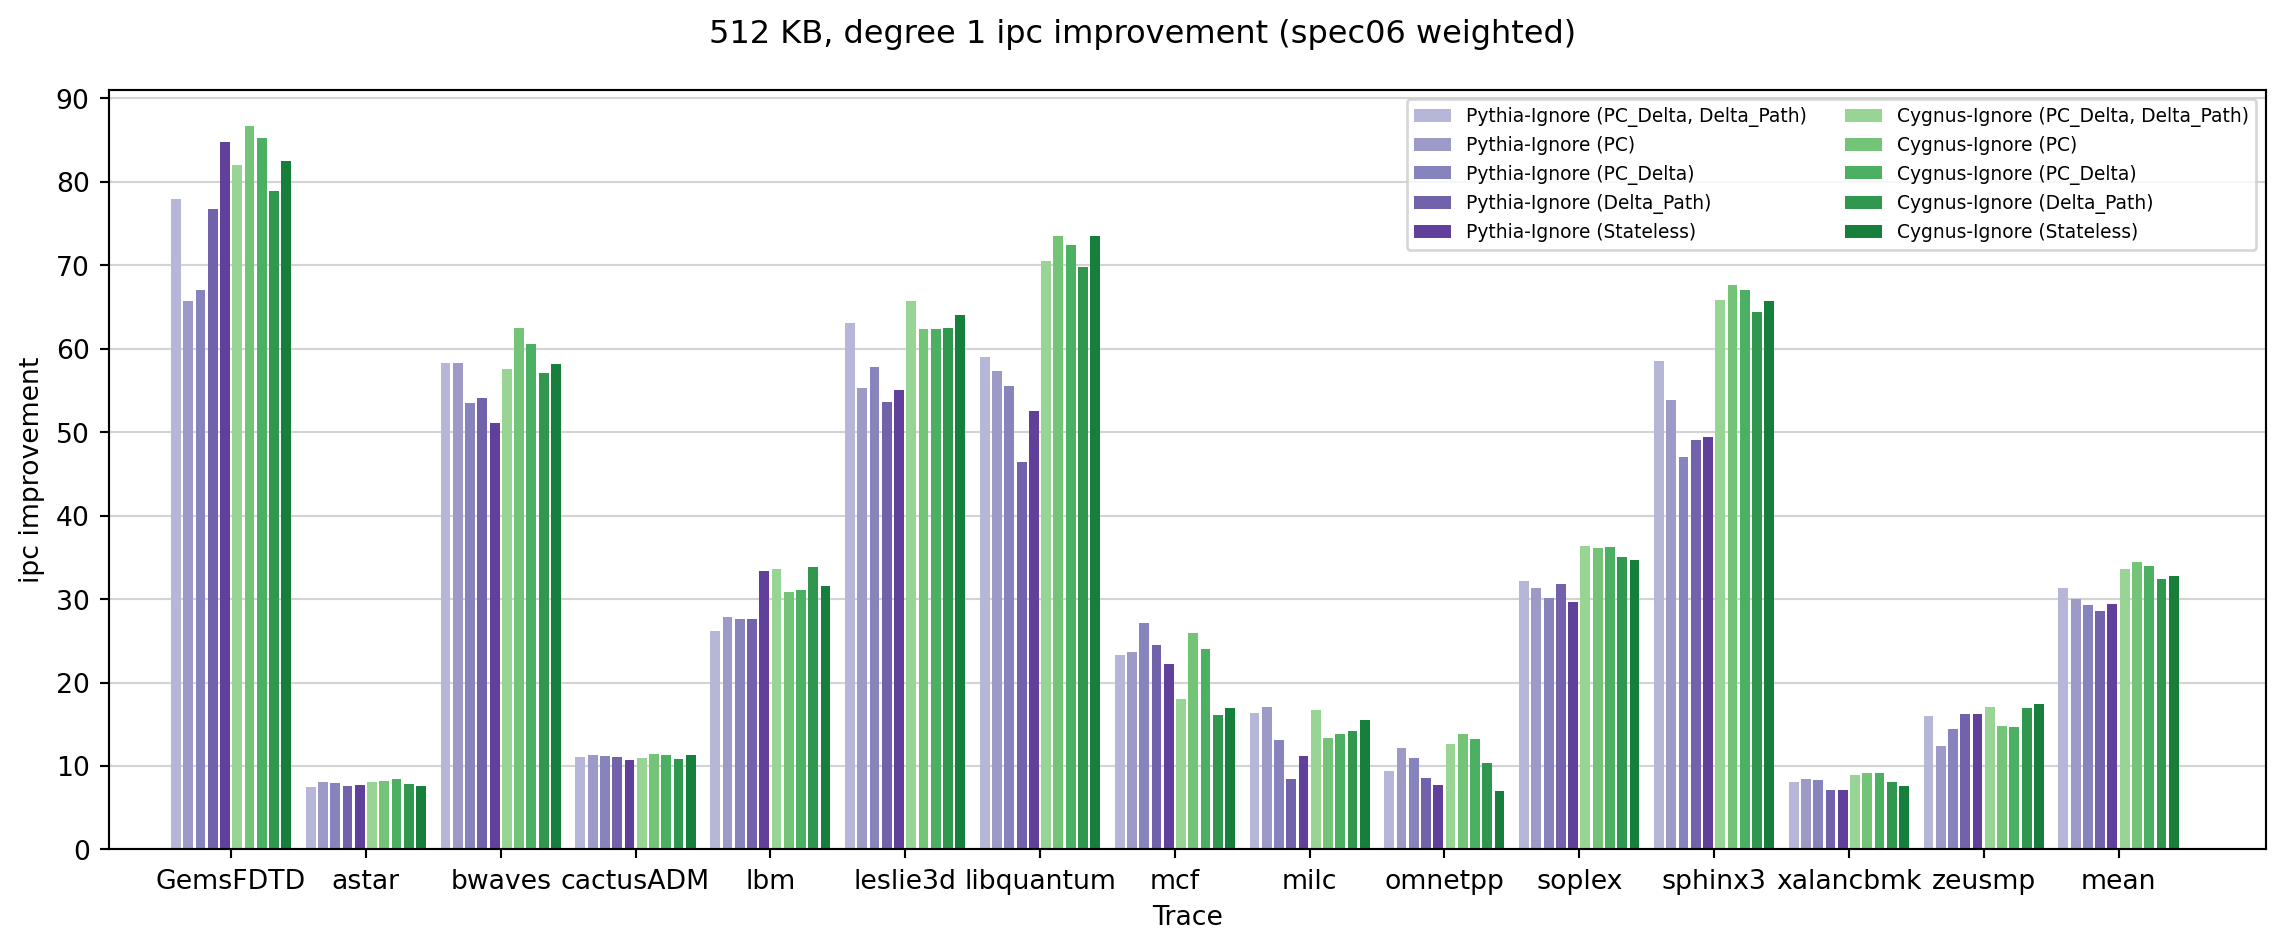

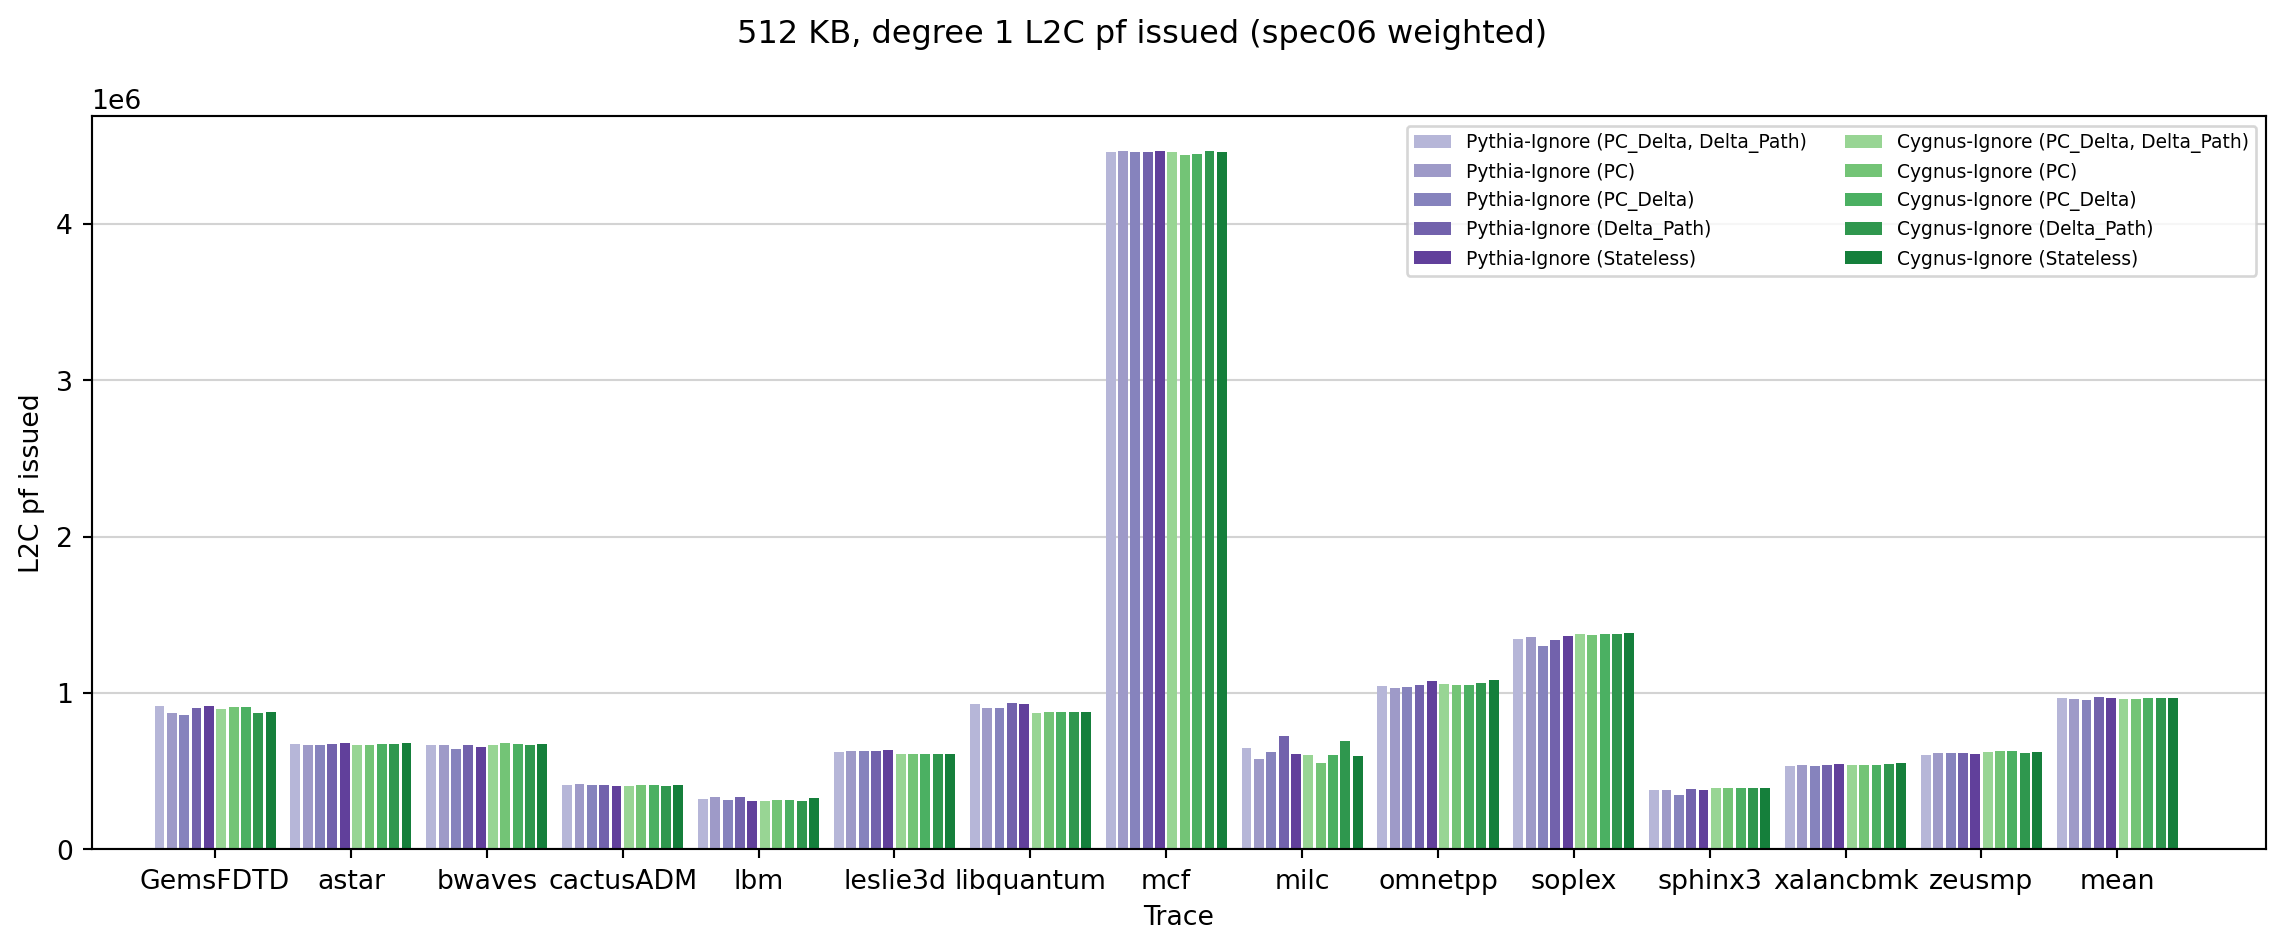

In [25]:
plots.plot_everything(features_df, suites=suites, metrics=metrics, colors=features_colors,
                      legend_kwargs=legend_kwargs, dpi=192, figsize=(12,5),
                      suptitle='512 KB, degree 1')

### Registering demand fills
By default, Pythia registers only prefetch fills, and Bythio registers prefetch *and* demand fills. (The default setting is denoted with a *.) How do they perform when we change these settings?

In [38]:
reload(stats)

feature = 'PC'

fill_df = {
    f'Pythia ({feature}) (*Prefetch)': dfs['degree1/pythia/nozeroaction'][feature],
    f'Pythia ({feature}) (Prefetch+Demand)': dfs['degree1/pythia/nozeroaction_demandfill'][feature],

    #f'Pythia-like Cygnus ({feature}) (*Prefetch)': dfs['degree1/bythio/nozeroaction_pythialike'][feature],
    #f'Pythia-like Cygnus ({feature}) (Prefetch+Demand)': dfs['degree1/bythio/nozeroaction_pythialike_demandfill'][feature],

    f'Cygnus ({feature}) (Prefetch)': dfs['degree1/bythio/nozeroaction_prefetchfill'][feature],
    f'Cygnus ({feature}) (*Prefetch+Demand)': dfs['degree1/bythio/nozeroaction'][feature],
    
    f'Cygnus-Ignore ({feature}) (Prefetch)': dfs['degree1/bythio/nozeroaction_prefetchfill_ignorequeued'][feature],
    f'Cygnus-Ignore ({feature}) (*Prefetch+Demand)': dfs['degree1/bythio/nozeroaction_ignorequeued'][feature],

    # 'Bythio (PC)': dfs['degree1/bythio/nozeroaction']['PC']

    #'BO-Adjusted': dfs['degree1/bo/nozeroaction_pythiaactions_256rr']['bo'],
}

fill_colors = {
    f'Pythia ({feature}) (*Prefetch)': cmaps['Pythia'](0.5),
    f'Pythia ({feature}) (Prefetch+Demand)': cmaps['Pythia'](0.7),

    f'Pythia-like Cygnus ({feature}) (*Prefetch)': cmaps['Pythia-Ignore'](0.5),
    f'Pythia-like Cygnus ({feature}) (Prefetch+Demand)': cmaps['Pythia-Ignore'](0.7),

    f'Cygnus ({feature}) (Prefetch)': cmaps['Bythio'](0.5),
    f'Cygnus ({feature}) (*Prefetch+Demand)': cmaps['Bythio'](0.7),

    f'Cygnus-Ignore ({feature}) (Prefetch)': cmaps['Bythio-Ignore'](0.5),
    f'Cygnus-Ignore ({feature}) (*Prefetch+Demand)': cmaps['Bythio-Ignore'](0.7),
}

legend_kwargs = {
    'fontsize': 7,
    'ncol': 3,
}

=== spec06 weighted ===


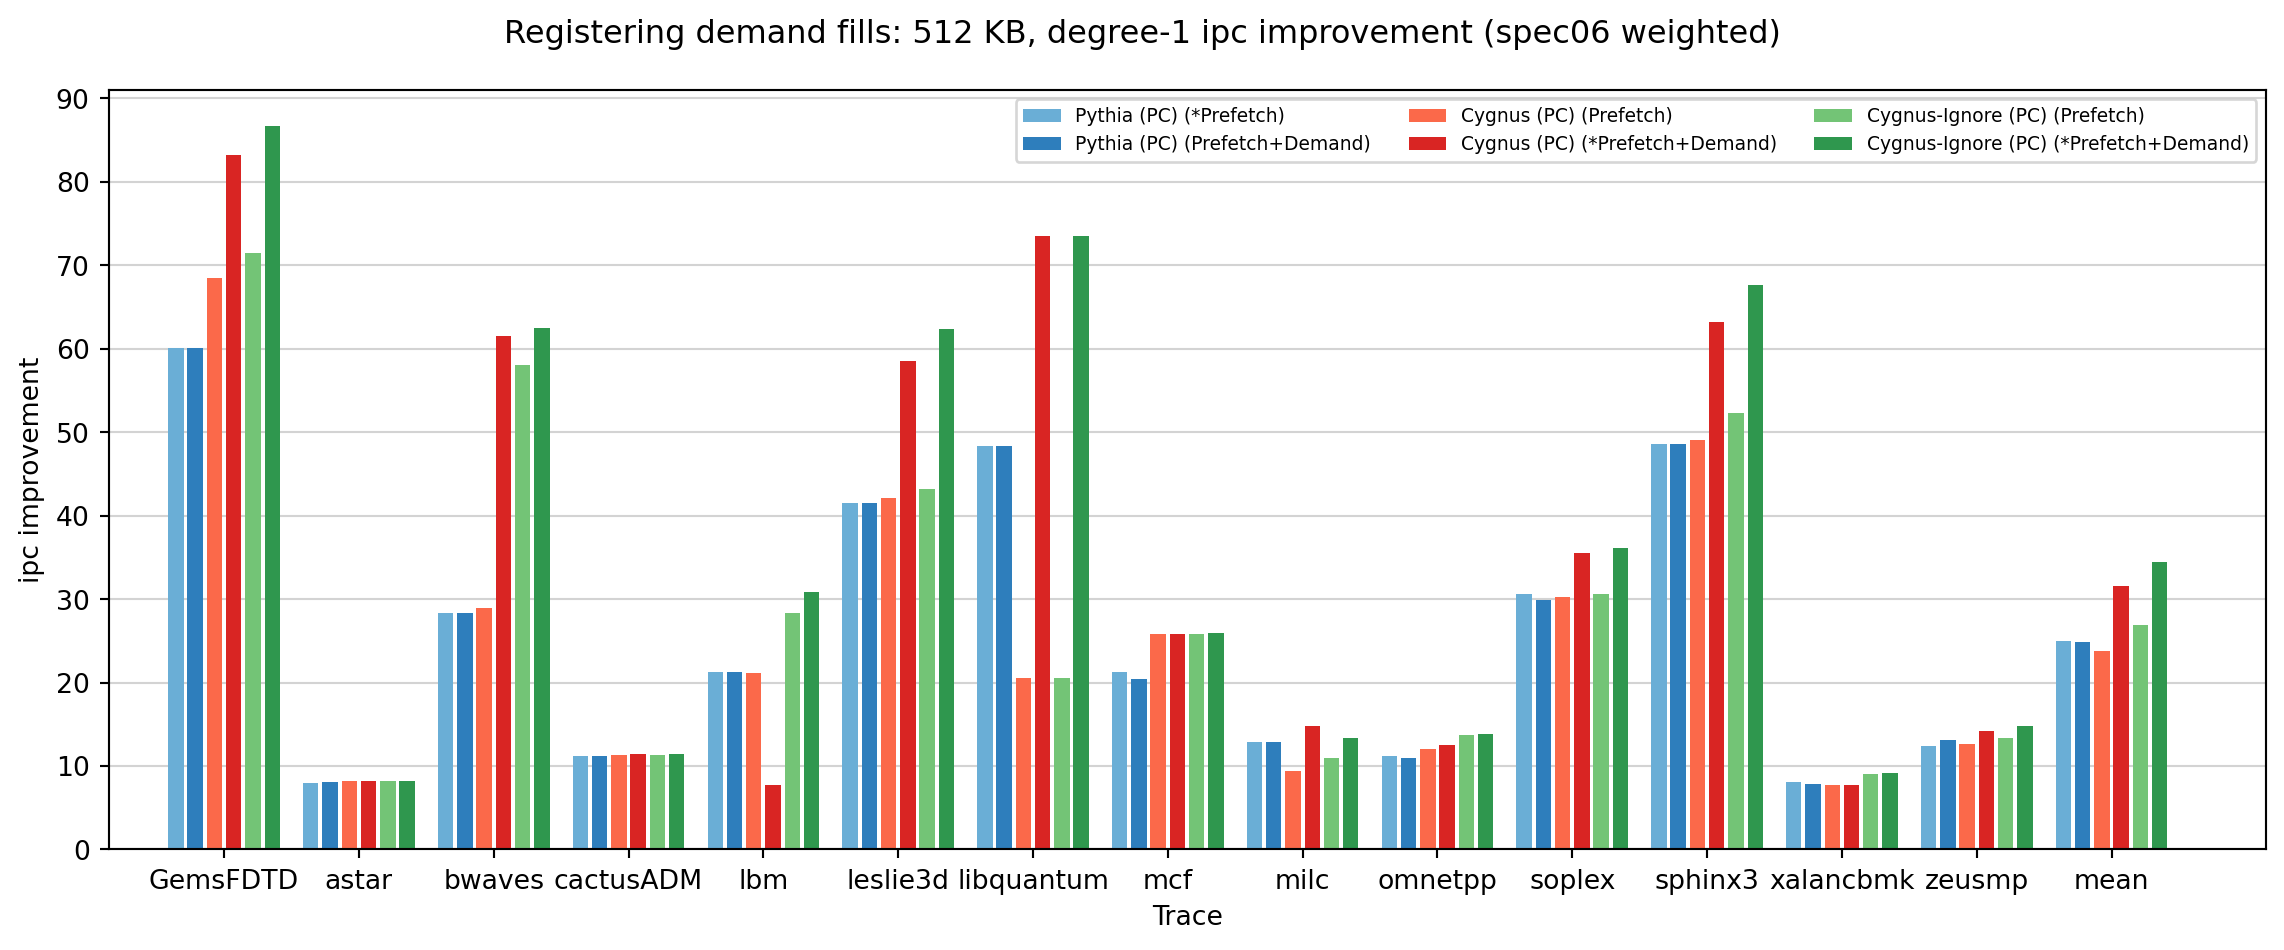

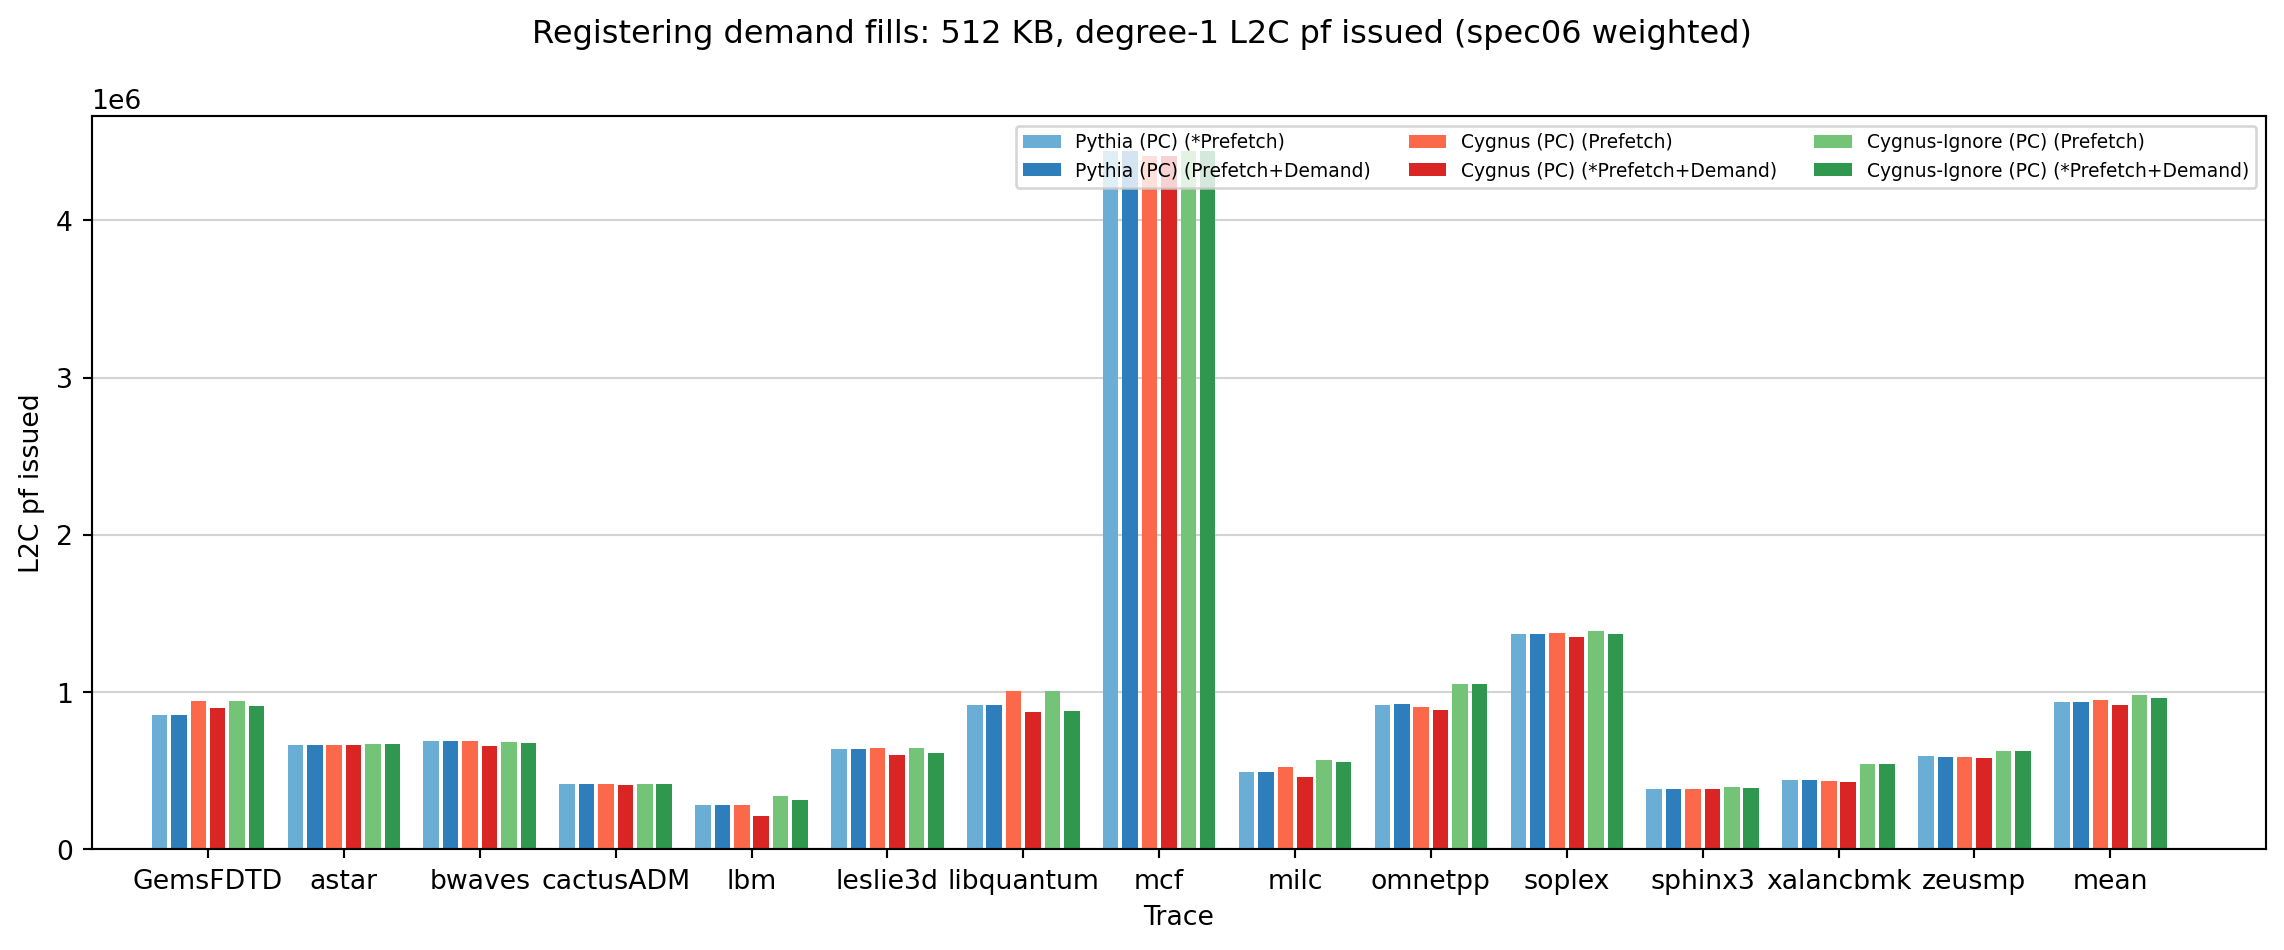

In [39]:
plots.plot_everything(fill_df, suites=suites, metrics=metrics, colors=fill_colors,
                      legend_kwargs=legend_kwargs, dpi=192, figsize=(12,5),
                      suptitle='Registering demand fills: 512 KB, degree-1')

### BO vs. Bythio

In [ ]:
bo_df = {
    'Bythio (Stateless)': dfs['degree1/bythio/nozeroaction']['Global'],
    #'BO (Fallback to 0)': dfs['degree1/baseline']['bo'],
    #'BO (Fallback to +1)': dfs['degree1/bo/fallback']['bo'],
    'BO': dfs['degree1/bo/nozeroaction']['bo'],
    'BO (256 RR entries, Pythia actions)': dfs['degree1/bo/nozeroaction_pythiaactions_256rr']['bo'],
    'BO (256 RR entries, Pythia actions, Simultaneous learning)': dfs['degree1/bo/nozeroaction_pythiaactions_256rr_simultaneous']['bo'],
}

bo_df_colors = {
    'Bythio (Stateless)': 'C5',
    #'BO (Fallback to 0)': 'C6',
    #'BO (Fallback to +1)': 'C7',
    'BO': 'darkgreen',
    'BO (256 RR entries, Pythia actions)': 'forestgreen',
    'BO (256 RR entries, Pythia actions, Simultaneous learning)': 'limegreen',
}

legend_kwargs = {
    'ncol': 4,
    'fontsize': 8,
}

plots.plot_everything(bo_df, suites=suites, metrics=metrics, colors=bo_df_colors,
                      legend_kwargs=legend_kwargs, dpi=192, figsize=(12,5))

### Sum-pooling features

In [96]:
dfs['degree1/bythio/nozeroaction_ignorequeued_sumpool'].keys()

dict_keys(['Delta_Path, PC_Delta', 'Delta_Path, PC', 'PC, PC_Delta', 'Delta_Path, PC, PC_Delta', 'Delta_Path, Global, PC_Delta', 'Global, PC, PC_Delta', 'Delta_Path, Global, PC', 'Delta_Path, Global, PC, PC_Delta'])

In [102]:
sumpool_df_features = [
    'Delta_Path, PC_Delta',
    #'Delta_Path, PC',
    'PC, PC_Delta',
    #'Delta_Path, PC, PC_Delta',
    #'Delta_Path, Global, PC_Delta',
    'Global, PC, PC_Delta',
    #'Delta_Path, Global, PC',
    #'Delta_Path, Global, PC, PC_Delta'
]

sumpool_df_feature_colors = [
    colormaps['Reds'],
    colormaps['Greens'],
    colormaps['Blues'],
    colormaps['Purples'],
    colormaps['Oranges'],
    colormaps['Greys']
]

sumpool_df = {}
sumpool_df_colors = {}

for i, feature in enumerate(sumpool_df_features):
    # Pythia
    #sumpool_df[f'Pythia-Max ({feature})'] = dfs['degree1/pythia/nozeroaction'][feature]
    #sumpool_df_colors[f'Pythia-Max ({feature})'] = sumpool_df_feature_colors[i](0.45)
    #sumpool_df[f'Pythia-Sum ({feature})'] = dfs['degree1/pythia/nozeroaction_sumpool'][feature]
    #sumpool_df_colors[f'Pythia-Sum ({feature})'] = sumpool_df_feature_colors[i](0.65)

    # Cygnus
    #sumpool_df[f'Cygnus-Max ({feature})'] = dfs['degree1/bythio/nozeroaction'][feature]
    #sumpool_df_colors[f'Cygnus-Max ({feature})'] = sumpool_df_feature_colors[i](0.45)
    #sumpool_df[f'Cygnus-Sum ({feature})'] = dfs['degree1/bythio/nozeroaction_sumpool'][feature]
    #sumpool_df_colors[f'Cygnus-Sum ({feature})'] = sumpool_df_feature_colors[i](0.65)

    # Cygnus-Ignore
    sumpool_df[f'Cygnus-Ignore-Max ({feature})'] = dfs['degree1/bythio/nozeroaction_ignorequeued'][feature]
    sumpool_df_colors[f'Cygnus-Ignore-Max ({feature})'] = sumpool_df_feature_colors[i](0.45)
    sumpool_df[f'Cygnus-Ignore-Sum ({feature})'] = dfs['degree1/bythio/nozeroaction_ignorequeued_sumpool'][feature]
    sumpool_df_colors[f'Cygnus-Ignore-Sum ({feature})'] = sumpool_df_feature_colors[i](0.65)

#sumpool_df['Pythia (PC)'] = dfs['degree1/pythia/nozeroaction']['PC']
#sumpool_df['Cygnus (PC)'] = dfs['degree1/bythio/nozeroaction']['PC']
sumpool_df['Cygnus-Ignore (PC)'] = dfs['degree1/bythio/nozeroaction_ignorequeued']['PC']

#sumpool_df_colors['Cygnus (PC)'] = 'C7'
sumpool_df_colors['Cygnus-Ignore (PC)'] = 'C7'

legend_kwargs = {
    'ncol': 4,#len(sumpool_df_features) + 1,
    'fontsize': 6,
}

=== spec06 weighted ===


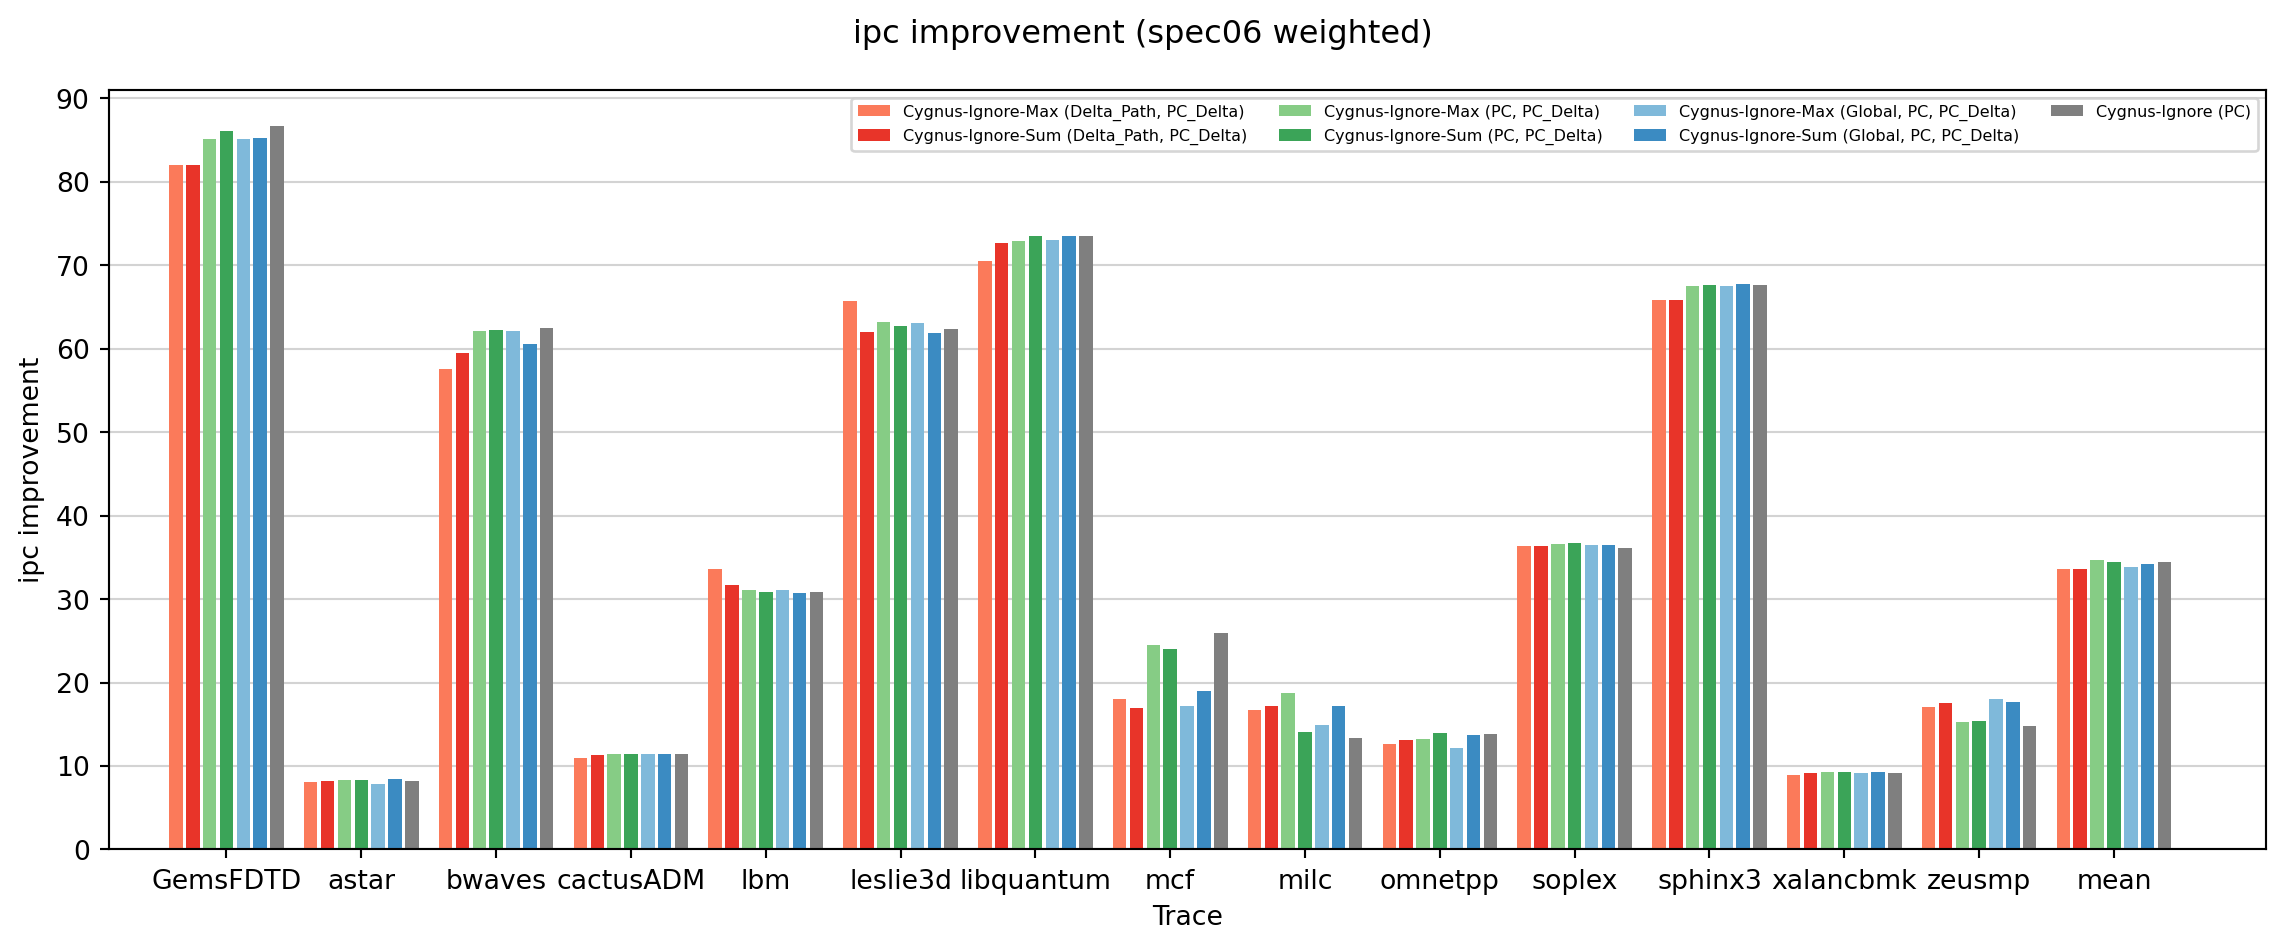

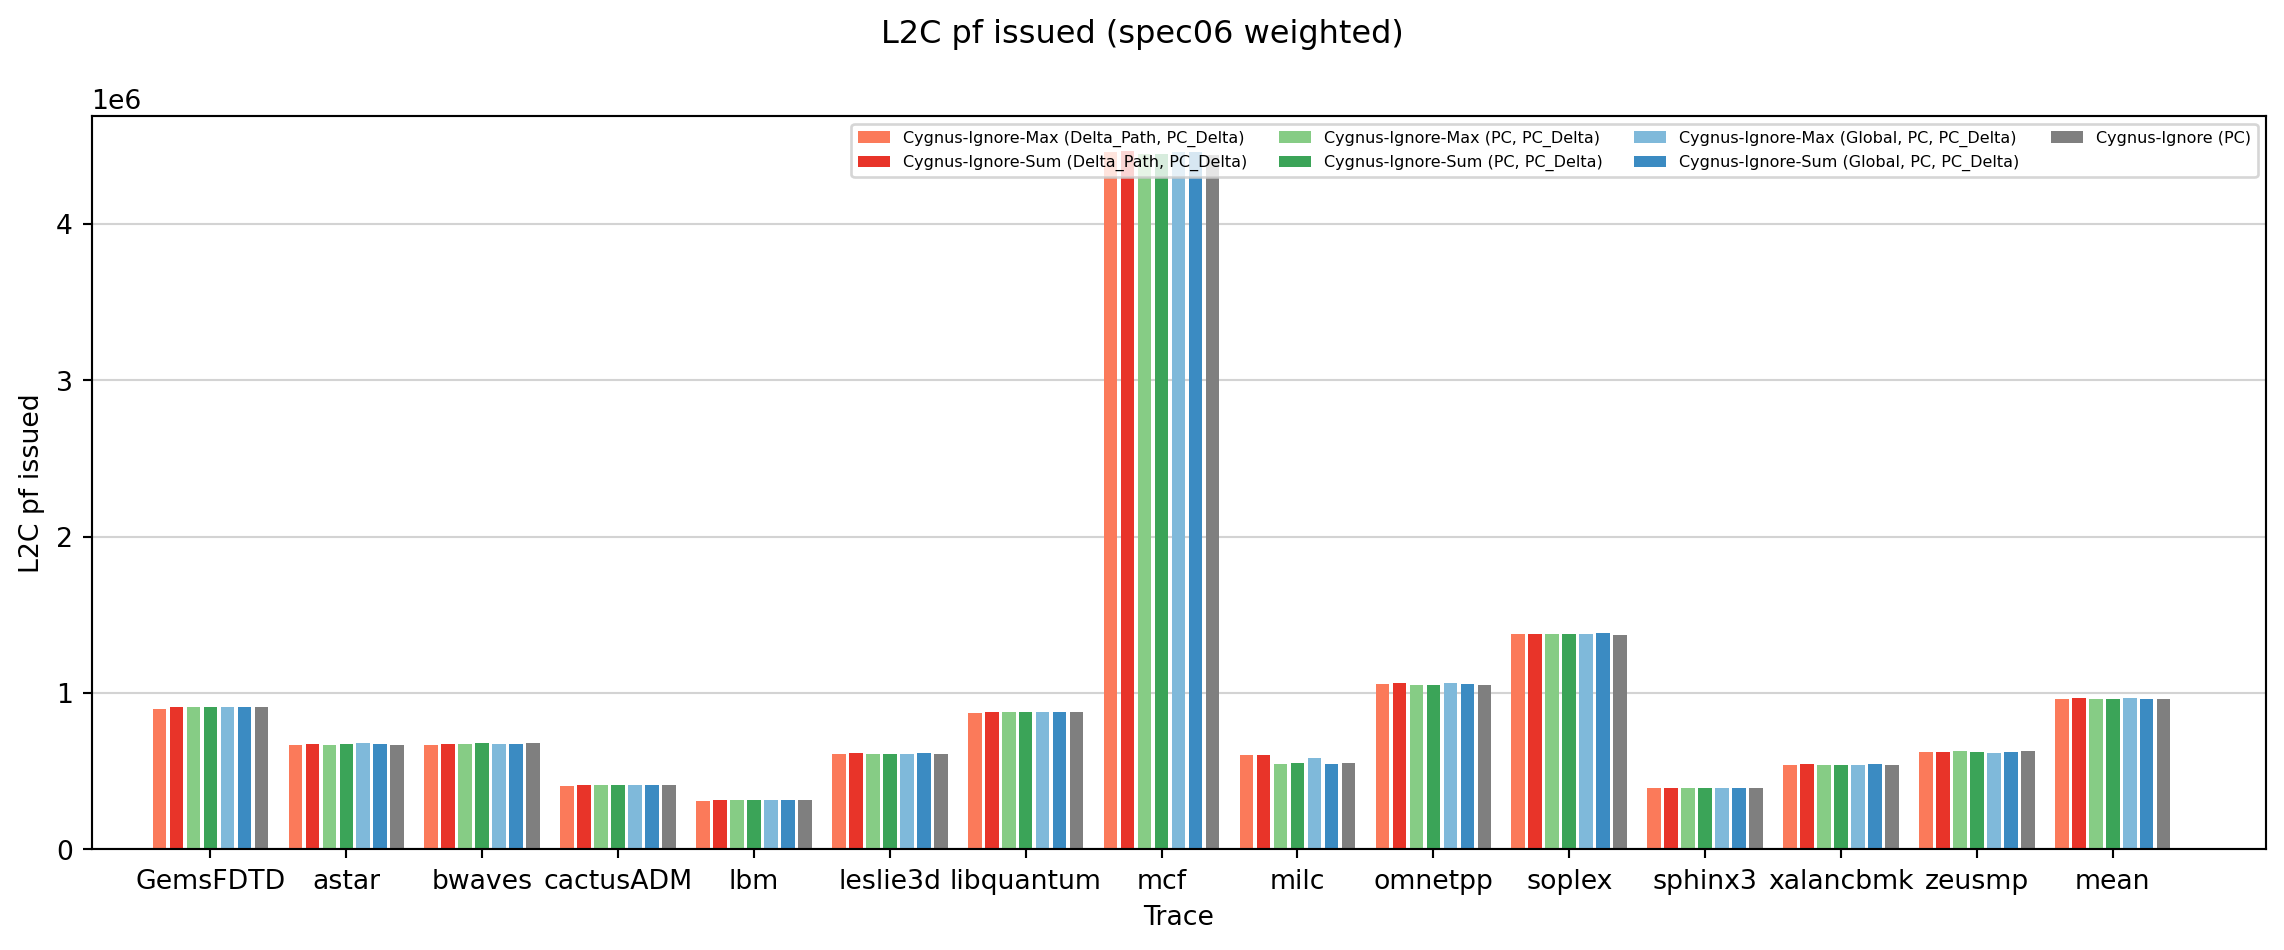

In [103]:
reload(plots)
reload(stats)
plots.plot_everything(sumpool_df, suites=suites, metrics=metrics, colors=sumpool_df_colors,
                      legend_kwargs=legend_kwargs, dpi=192, figsize=(12,5))

### Pythia-like Bythio
Try to correlate a Pythia-like version of Bythio to the original Pythia implementation.

=== spec06 weighted ===


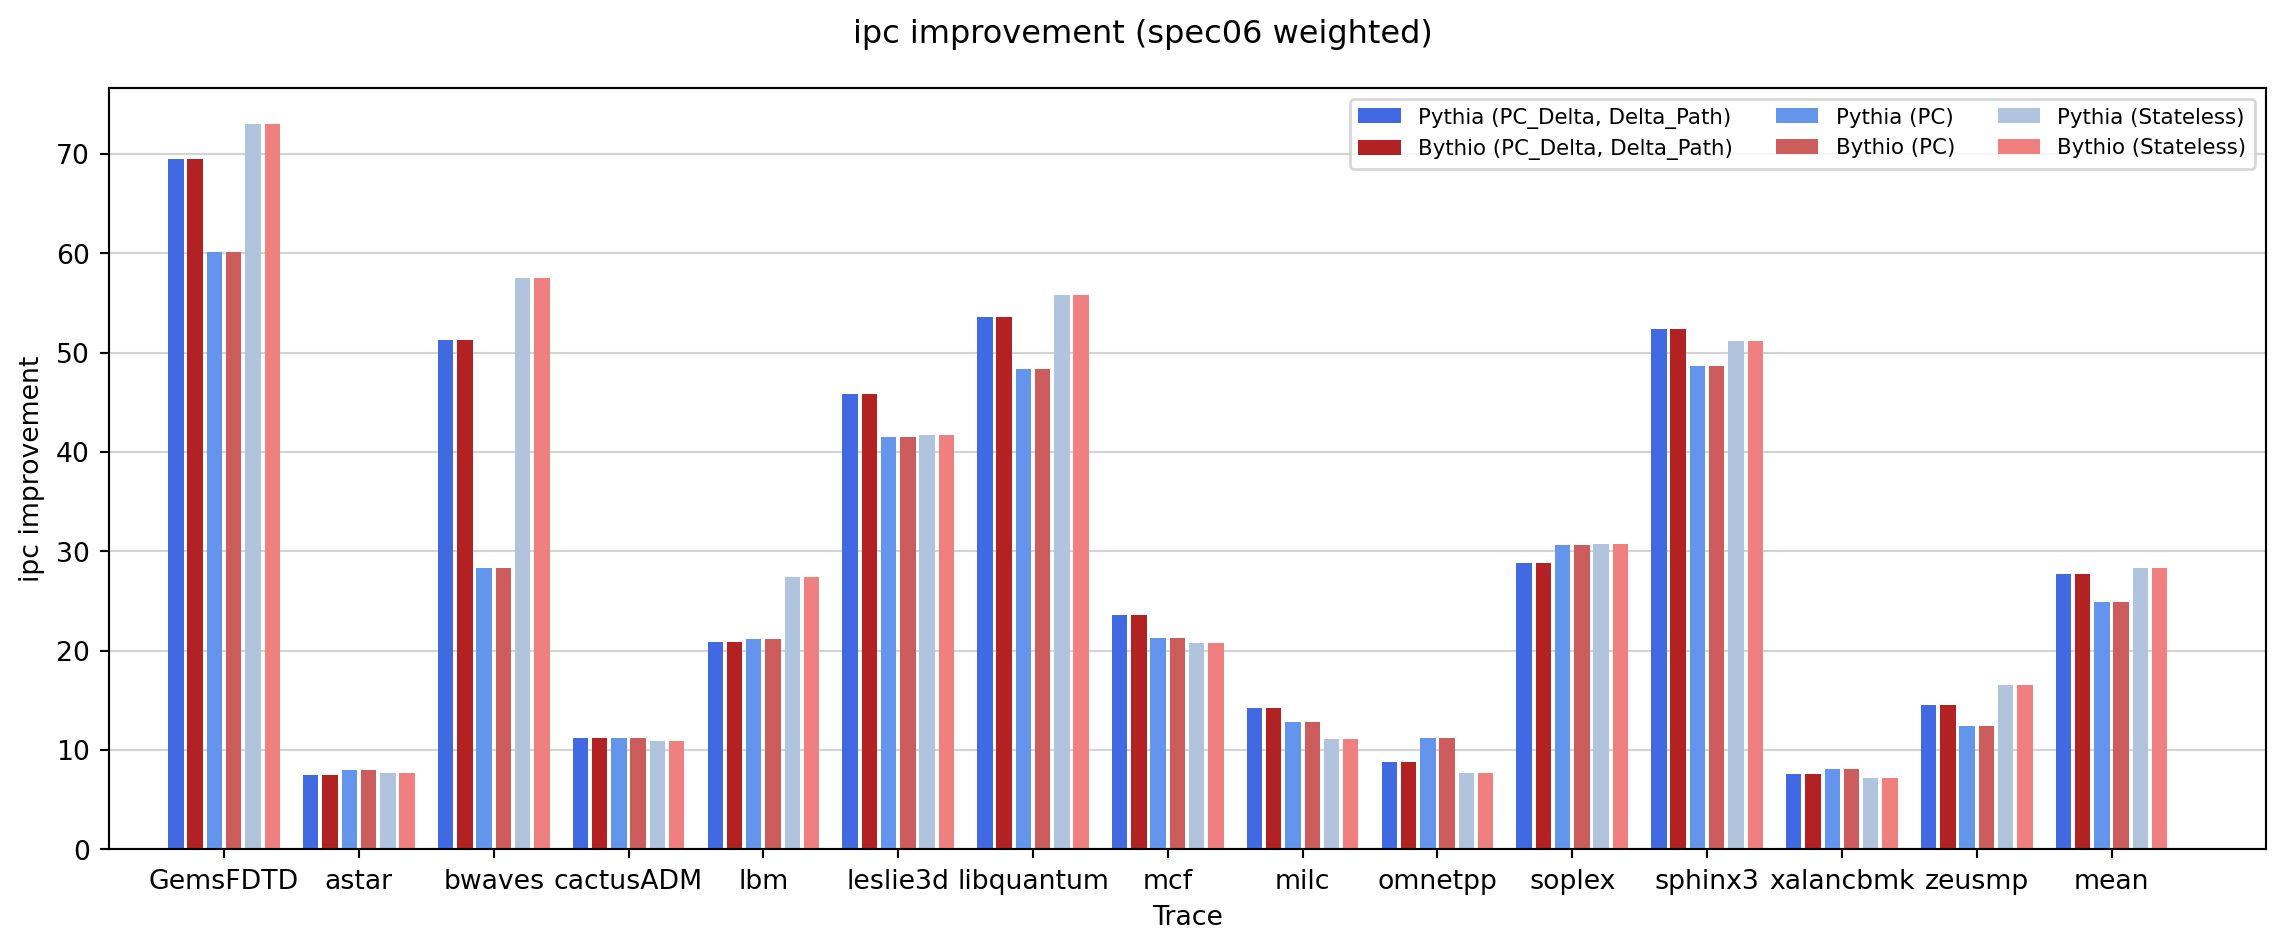

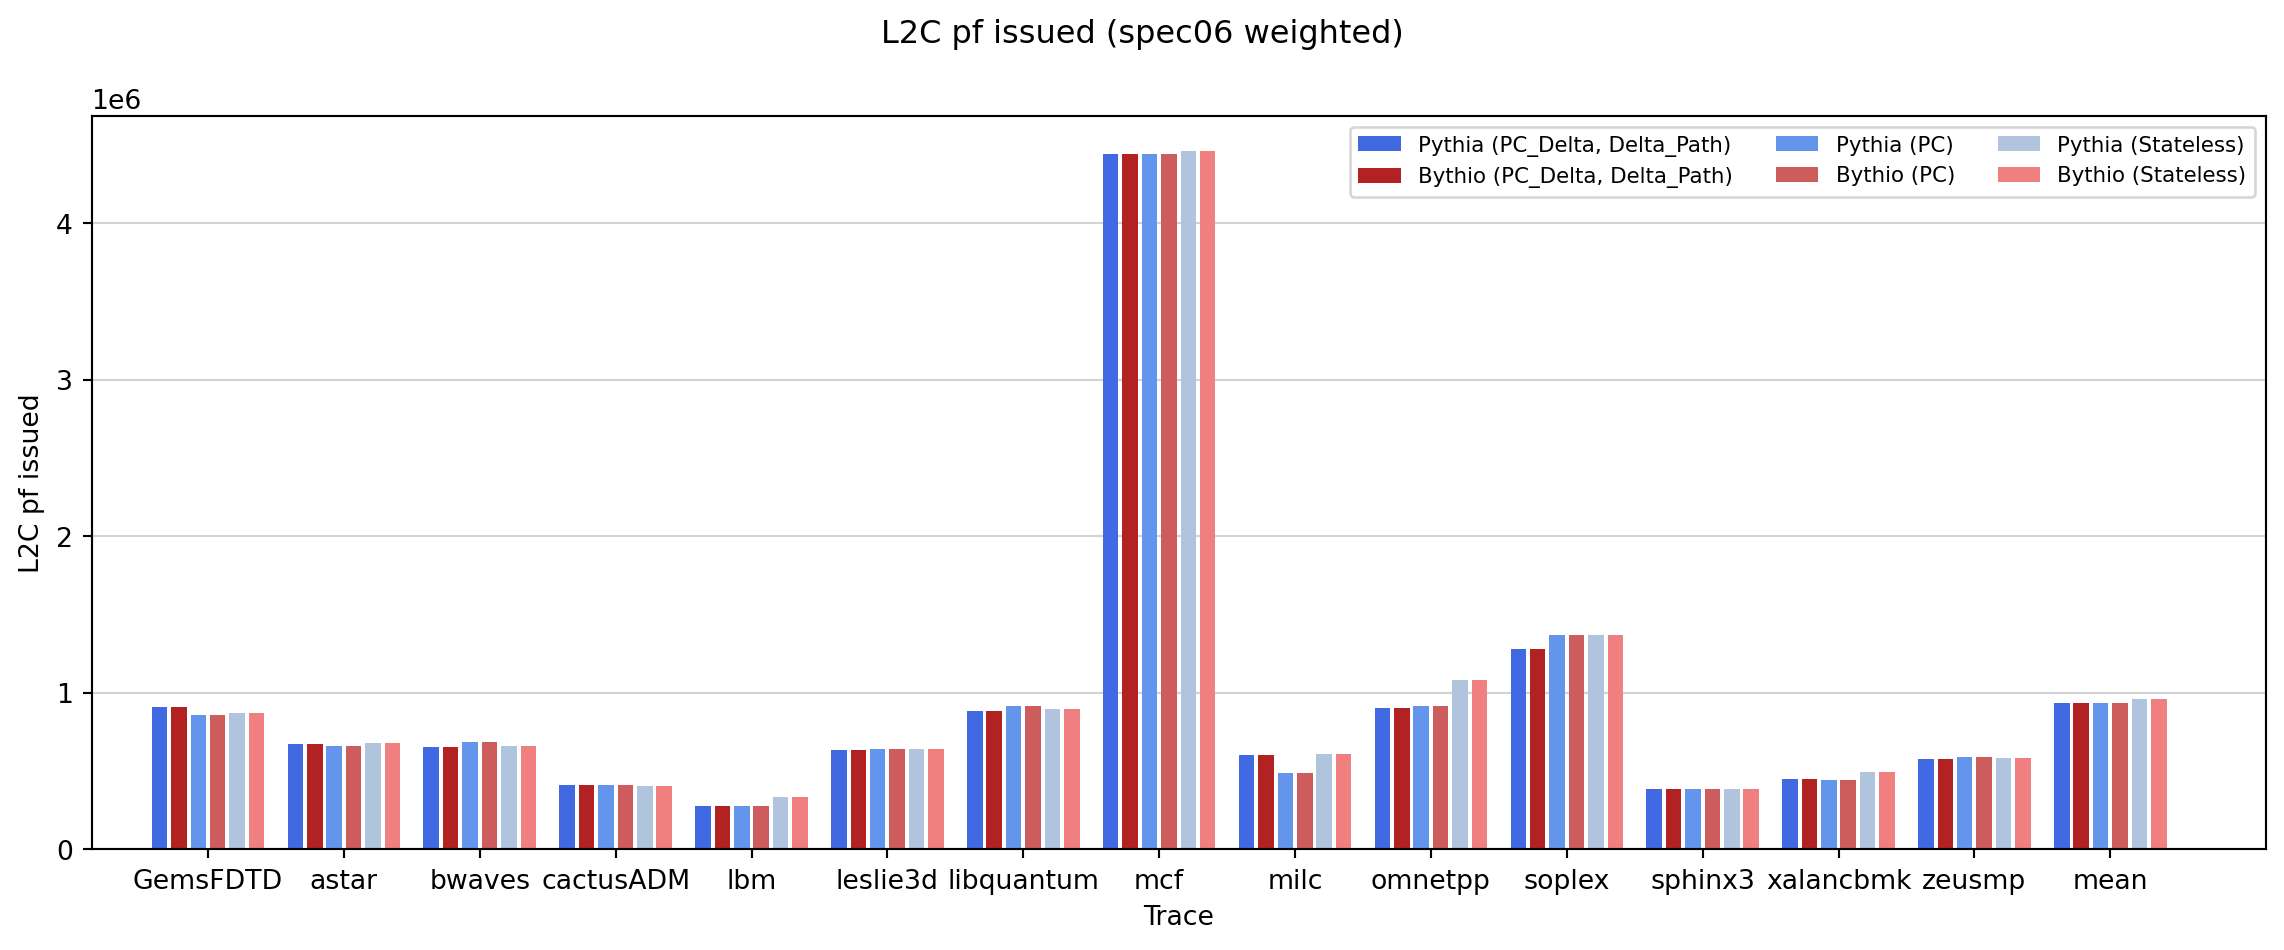

In [33]:
pythialike_df = {
    'Pythia (PC_Delta, Delta_Path)': dfs['degree1/pythia/nozeroaction']['Delta_Path, PC_Delta'],
    'Bythio (PC_Delta, Delta_Path)': dfs['degree1/bythio/nozeroaction_pythialike']['Delta_Path, PC_Delta'],
    'Pythia (PC)': dfs['degree1/pythia/nozeroaction']['PC'],
    'Bythio (PC)': dfs['degree1/bythio/nozeroaction_pythialike']['PC'],
    'Pythia (Stateless)': dfs['degree1/pythia/nozeroaction']['Global'],
    'Bythio (Stateless)': dfs['degree1/bythio/nozeroaction_pythialike']['Global'],
    # 'Pythia-Demand (Stateless)': dfs['degree1/pythia/nozeroaction_demandfill']['Global'],
    # 'Bythio-Demand (Stateless)': dfs['degree1/bythio/nozeroaction_pythialike_demandfill']['Global'],
}

pythialike_df_colors = {
    'Pythia (PC_Delta, Delta_Path)': 'royalblue',
    'Bythio (PC_Delta, Delta_Path)': 'firebrick',
    'Pythia (PC)': 'cornflowerblue',
    'Bythio (PC)': 'indianred',
    'Pythia (Stateless)': 'lightsteelblue',
    'Bythio (Stateless)': 'lightcoral',
}

legend_kwargs = {
    'ncol': 3,
    'fontsize': 8,
}

plots.plot_everything(pythialike_df, suites=suites, metrics=metrics, colors=pythialike_df_colors,
                      legend_kwargs=legend_kwargs, dpi=192, figsize=(12,5))

## Dynamic degree

### Fair baselines

In [6]:
reload(plots)
from utils import stats
reload(stats)
ddyn_fair_baseline_df = {
    #'Pythia (PC_Delta, Delta_Path)': dfs['degreedyn/pythia/nozeroaction']['Delta_Path, PC_Delta'],
    #'Pythia (Delta_Path)': dfs['degreedyn/pythia/nozeroaction']['Delta_Path'],
    #'Pythia (PC)': dfs['degreedyn/pythia/nozeroaction']['PC'],
    #'Pythia (Stateless)': dfs['degreedyn/pythia/nozeroaction']['Global'],

    'Pythia-Ignore (PC_Delta, Delta_Path)': dfs['degreedyn/bythio/nozeroaction_pythialike_ignorequeued']['Delta_Path, PC_Delta'],
    #'Pythia-Ignore (Delta_Path)': dfs['degreedyn/bythio/nozeroaction_pythialike_ignorequeued']['Delta_Path'],
    'Pythia-Ignore (PC)': dfs['degreedyn/bythio/nozeroaction_pythialike_ignorequeued']['PC'],
    'Pythia-Ignore (Stateless)': dfs['degreedyn/bythio/nozeroaction_pythialike_ignorequeued']['Global'],

    'Bythio-Ignore (PC_Delta, Delta_Path)': dfs['degreedyn/bythio/nozeroaction_ignorequeued']['Delta_Path, PC_Delta'],
    #'Bythio-Ignore (Delta_Path)': dfs['degreedyn/bythio/nozeroaction_ignorequeued']['Delta_Path'],
    'Bythio-Ignore (PC)': dfs['degreedyn/bythio/nozeroaction_ignorequeued']['PC'],
    'Bythio-Ignore (Stateless)': dfs['degreedyn/bythio/nozeroaction_ignorequeued']['Global'],

    'Bythio (PC_Delta, Delta_Path)': dfs['degreedyn/bythio/nozeroaction']['Delta_Path, PC_Delta'],
    #'Bythio (Delta_Path)': dfs['degreedyn/bythio/nozeroaction']['Delta_Path'],
    'Bythio (PC)': dfs['degreedyn/bythio/nozeroaction']['PC'],
    'Bythio (Stateless)': dfs['degreedyn/bythio/nozeroaction']['Global'],

    'SPP+PPF': dfs['degreedyn/baseline']['spp_ppf_dev'],
    'SPP': dfs['degreedyn/baseline']['spp_dev2'],
    #'Bingo': dfs['degreedyn/baseline']['bingo'],
    
}

ddyn_baselne_colors = {
    'Pythia (PC_Delta, Delta_Path)': cmaps['Pythia'](0.4),
    'Pythia (Delta_Path)': cmaps['Pythia'](0.5),
    'Pythia (PC)': cmaps['Pythia'](0.6),
    'Pythia (Stateless)': cmaps['Pythia'](0.7),

    'Pythia-Ignore (PC_Delta, Delta_Path)':  cmaps['Pythia-Ignore'](0.4),
    'Pythia-Ignore (Delta_Path)': cmaps['Pythia-Ignore'](0.5),
    'Pythia-Ignore (PC)':  cmaps['Pythia-Ignore'](0.6),
    'Pythia-Ignore (Stateless)':  cmaps['Pythia-Ignore'](0.7),

    'Bythio-Ignore (PC_Delta, Delta_Path)': cmaps['Bythio-Ignore'](0.4),
    'Bythio-Ignore (Delta_Path)': cmaps['Bythio-Ignore'](0.5),
    'Bythio-Ignore (PC)': cmaps['Bythio-Ignore'](0.6),
    'Bythio-Ignore (Stateless)': cmaps['Bythio-Ignore'](0.7),

    'Bythio (PC_Delta, Delta_Path)': cmaps['Bythio'](0.4),
    'Bythio (Delta_Path)': cmaps['Bythio'](0.5),
    'Bythio (PC)': cmaps['Bythio'](0.6),
    'Bythio (Stateless)': cmaps['Bythio'](0.7),

    'SPP+PPF': 'darkgoldenrod',
    'SPP': 'goldenrod',

    'Bingo': 'darkviolet',
}

legend_kwargs = {
    'ncol': 4,
    'fontsize': 5,
}

NameError: name 'dfs' is not defined

In [5]:
plots.plot_everything(ddyn_fair_baseline_df, suites=suites, metrics=metrics, colors=ddyn_baselne_colors,
                      legend_kwargs=legend_kwargs, dpi=192, figsize=(12,5))

NameError: name 'ddyn_fair_baseline_df' is not defined

In [ ]:
plots.plot_everything_accuracy(ddyn_fair_baseline_df, level='L2C', suites=suites, colors=ddyn_baselne_colors,
                               legend_kwargs=legend_kwargs, dpi=192, figsize=(12,5))

=== spec06 weighted ===


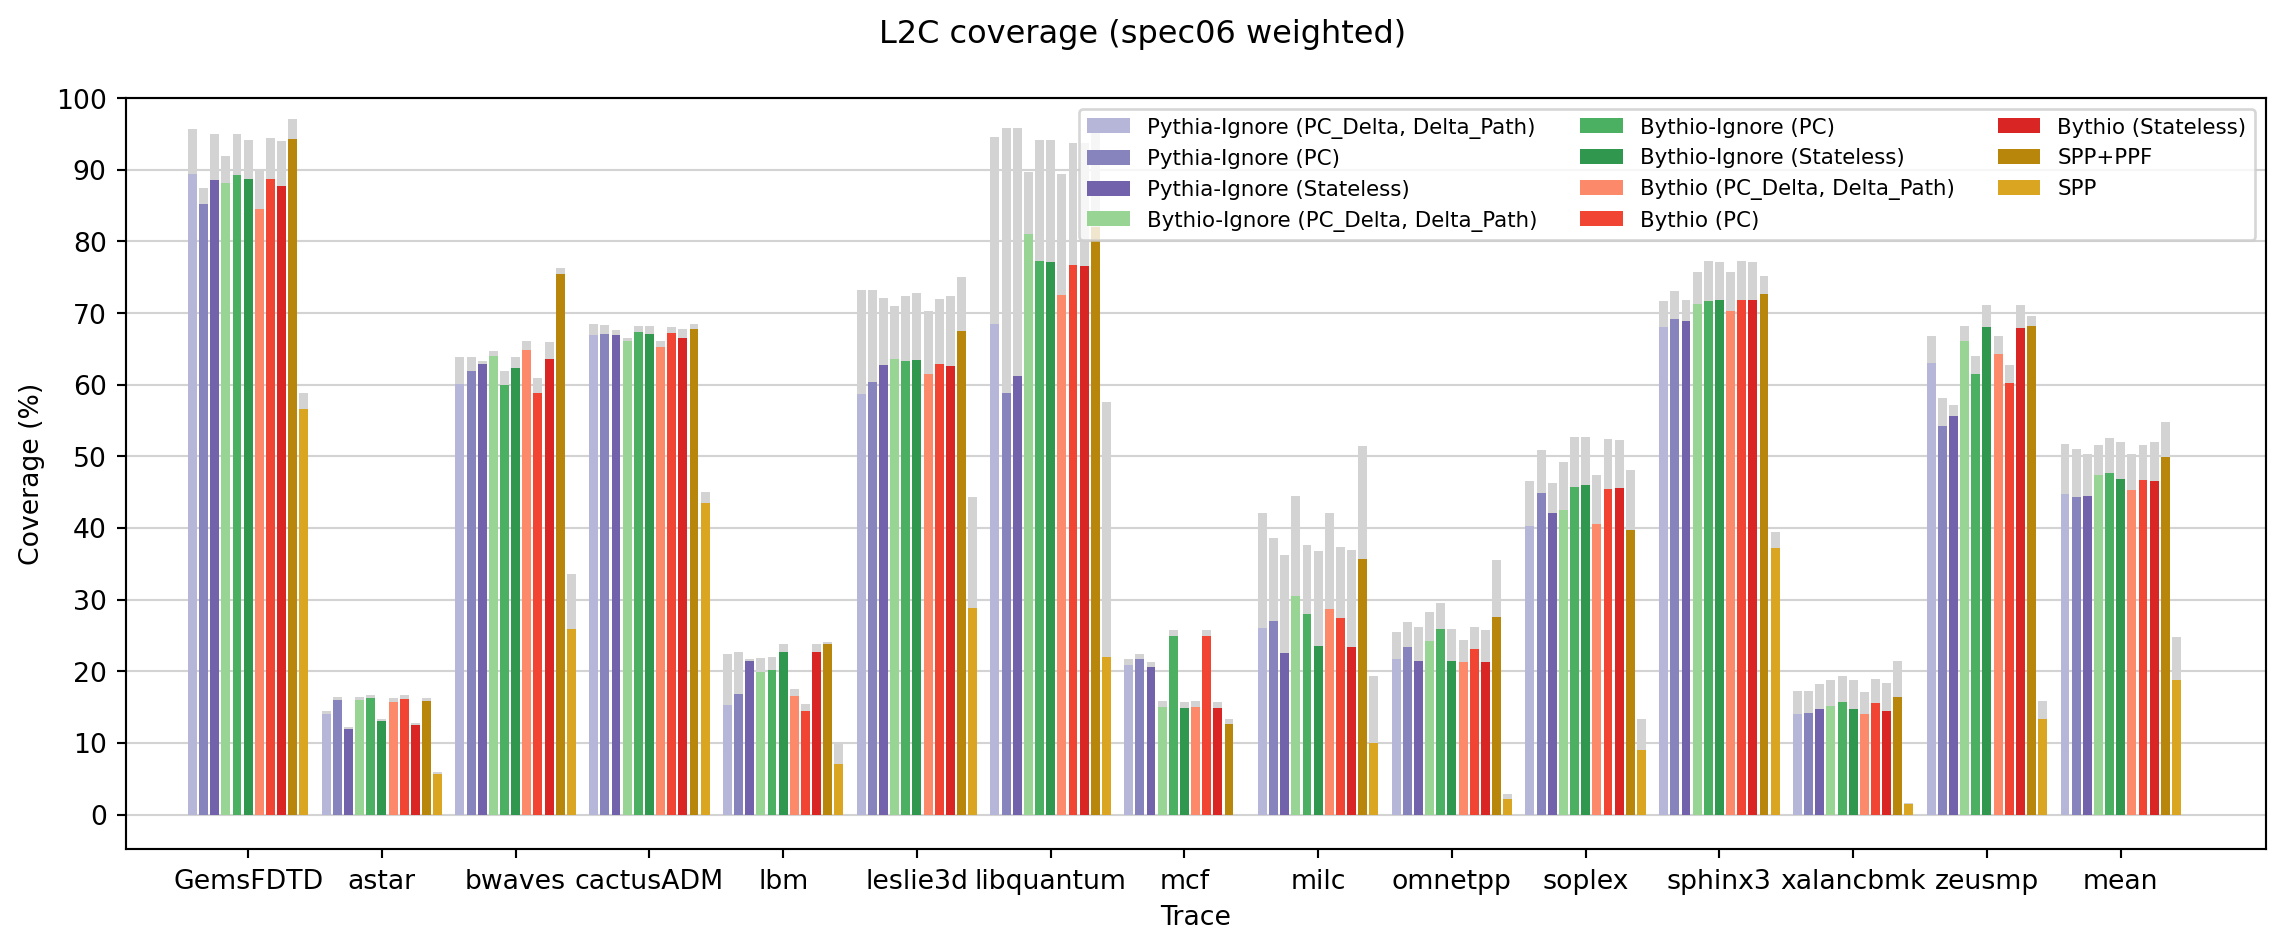

=== gap one_phase ===


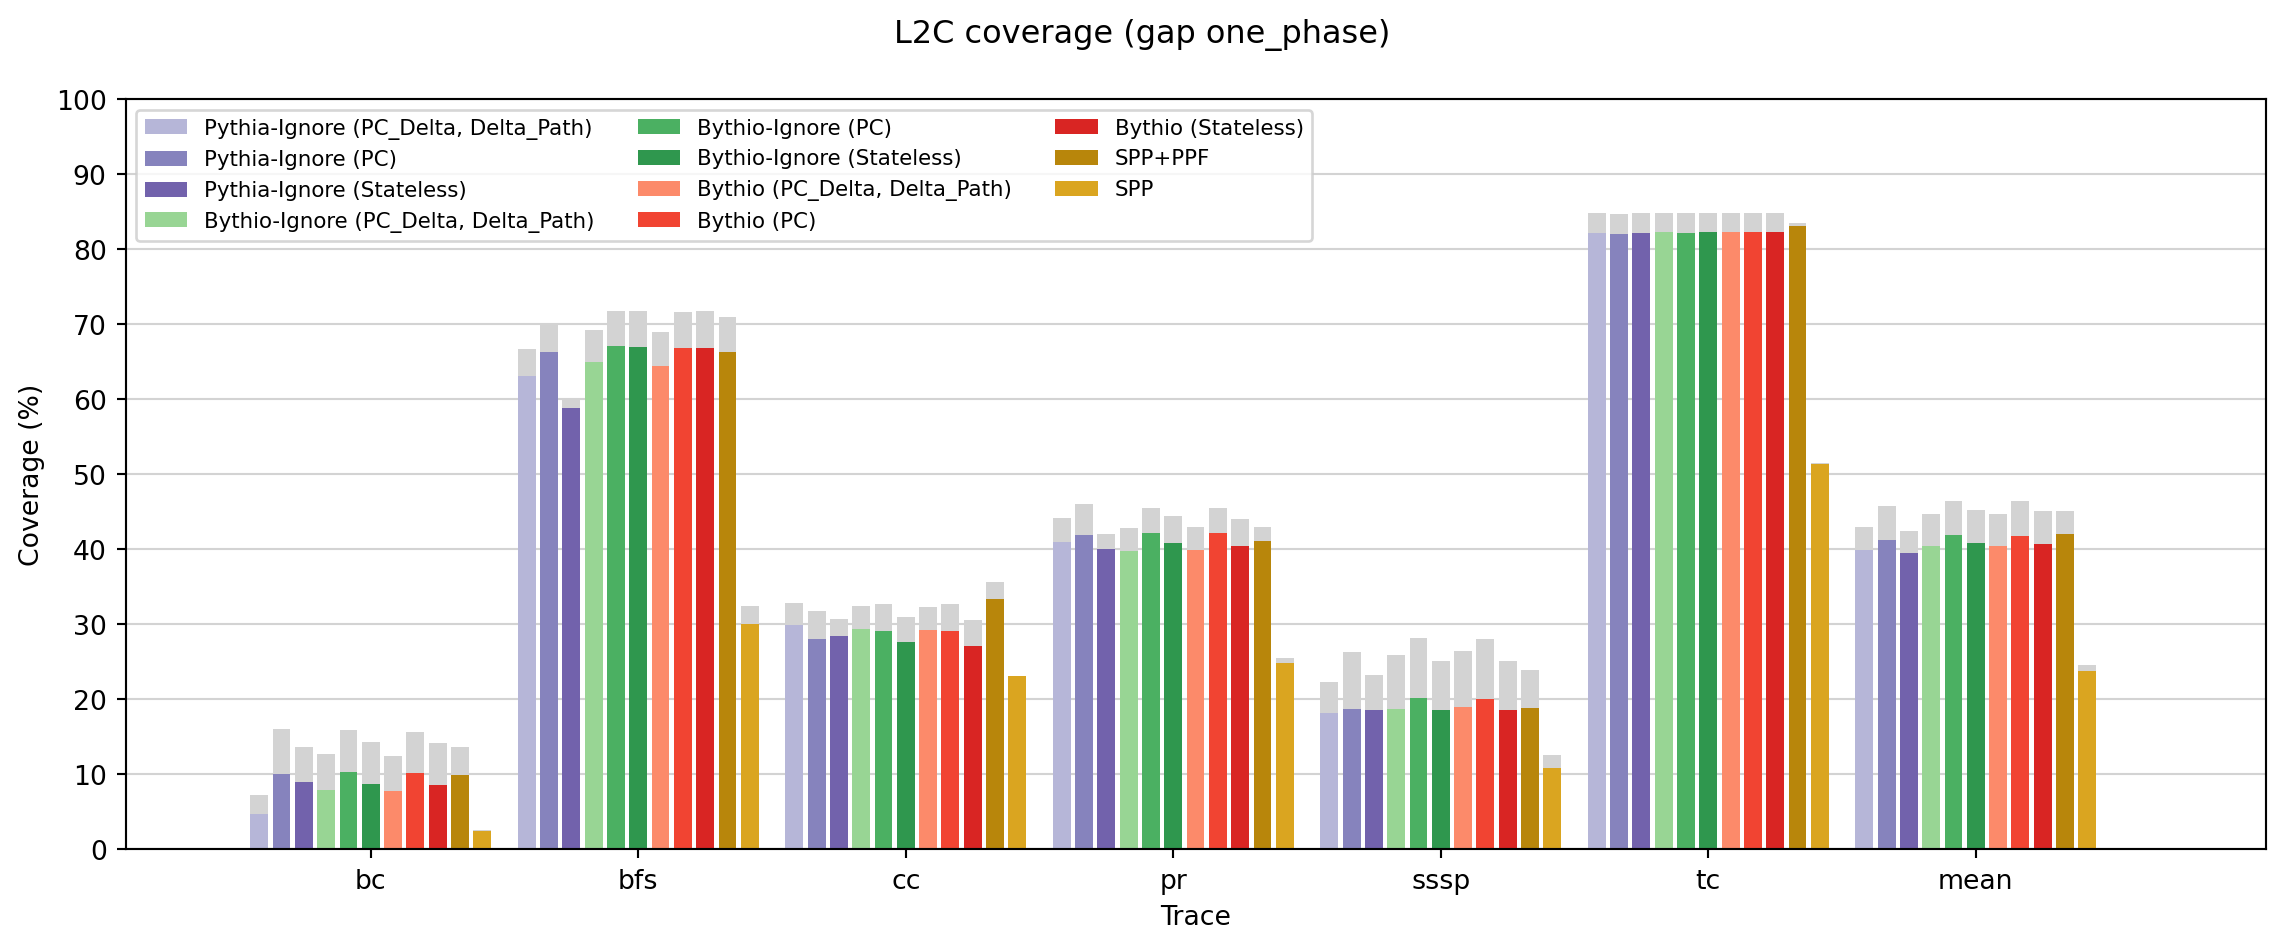

=== google one_phase ===


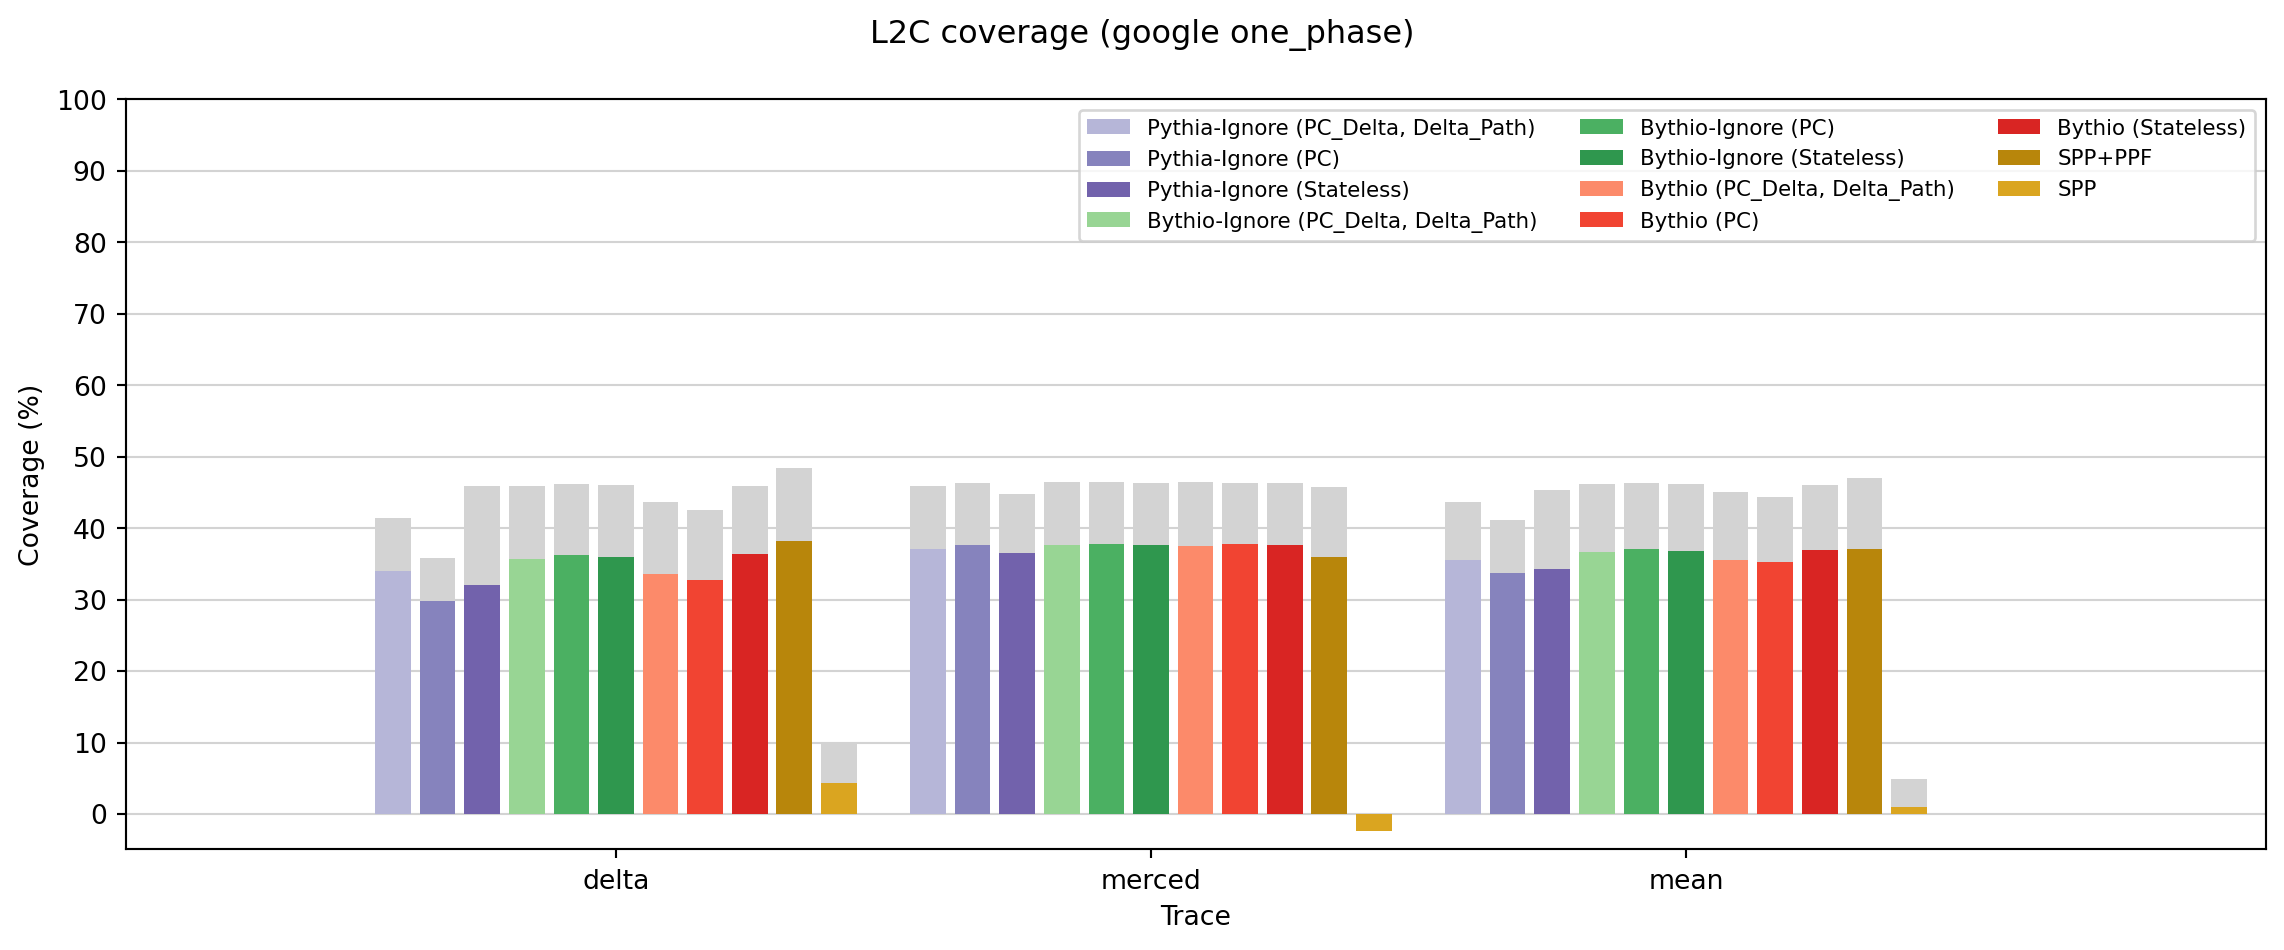

In [69]:
plots.plot_everything_coverage(ddyn_fair_baseline_df, level='L2C', suites=suites, colors=ddyn_baselne_colors,
                               legend_kwargs=legend_kwargs, dpi=192, figsize=(12,5))

### Features

In [26]:
reload(stats)
ddyn_features_df = {
    # 'Pythia (PC_Delta, Delta_Path)': dfs['degreedyn/pythia/nozeroaction']['Delta_Path, PC_Delta'],
    # 'Pythia (PC)': dfs['degreedyn/pythia/nozeroaction']['PC'],
    # 'Pythia (PC_Delta)': dfs['degreedyn/pythia/nozeroaction']['PC_Delta'],
    # 'Pythia (Delta_Path)': dfs['degreedyn/pythia/nozeroaction']['Delta_Path'],
    # 'Pythia (Stateless)': dfs['degreedyn/pythia/nozeroaction']['Global'],
    
    'Pythia-Ignore (PC_Delta, Delta_Path)': dfs['degreedyn/bythio/nozeroaction_pythialike_ignorequeued']['Delta_Path, PC_Delta'],
    'Pythia-Ignore (PC)': dfs['degreedyn/bythio/nozeroaction_pythialike_ignorequeued']['PC'],
    'Pythia-Ignore (PC_Delta)': dfs['degreedyn/bythio/nozeroaction_pythialike_ignorequeued']['PC_Delta'],
    'Pythia-Ignore (Delta_Path)': dfs['degreedyn/bythio/nozeroaction_pythialike_ignorequeued']['Delta_Path'],
    'Pythia-Ignore (Stateless)': dfs['degreedyn/bythio/nozeroaction_pythialike_ignorequeued']['Global'],

    'Cygnus-Ignore (PC_Delta, Delta_Path)' : dfs['degreedyn/bythio/nozeroaction_ignorequeued']['Delta_Path, PC_Delta'],
    'Cygnus-Ignore (PC)': dfs['degreedyn/bythio/nozeroaction_ignorequeued']['PC'],
    'Cygnus-Ignore (PC_Delta)': dfs['degreedyn/bythio/nozeroaction_ignorequeued']['PC_Delta'],
    'Cygnus-Ignore (Delta_Path)': dfs['degreedyn/bythio/nozeroaction_ignorequeued']['Delta_Path'],
    'Cygnus-Ignore (Stateless)': dfs['degreedyn/bythio/nozeroaction_ignorequeued']['Global'],

    # 'Bythio (PC)': dfs['degreedyn/bythio/nozeroaction']['PC']
}

ddyn_features_colors = {
    'Pythia (PC_Delta, Delta_Path)': cmaps['Pythia'](0.4),
    'Pythia (PC)': cmaps['Pythia'](0.5),
    'Pythia (PC_Delta)': cmaps['Pythia'](0.6),
    'Pythia (Delta_Path)': cmaps['Pythia'](0.7),
    'Pythia (Stateless)': cmaps['Pythia'](0.8),

    'Pythia-Ignore (PC_Delta, Delta_Path)':  cmaps['Pythia-Ignore'](0.4),
    'Pythia-Ignore (PC)':  cmaps['Pythia-Ignore'](0.5),
    'Pythia-Ignore (PC_Delta)': cmaps['Pythia-Ignore'](0.6),
    'Pythia-Ignore (Delta_Path)': cmaps['Pythia-Ignore'](0.7),
    'Pythia-Ignore (Stateless)':  cmaps['Pythia-Ignore'](0.8),

    'Cygnus-Ignore (PC_Delta, Delta_Path)': cmaps['Bythio-Ignore'](0.4),
    'Cygnus-Ignore (PC)': cmaps['Bythio-Ignore'](0.5),
    'Cygnus-Ignore (PC_Delta)': cmaps['Bythio-Ignore'](0.6),
    'Cygnus-Ignore (Delta_Path)': cmaps['Bythio-Ignore'](0.7),
    'Cygnus-Ignore (Stateless)': cmaps['Bythio-Ignore'](0.8),
}

legend_kwargs = {
    'fontsize': 7,
    'ncol': 2,
}

=== spec06 weighted ===


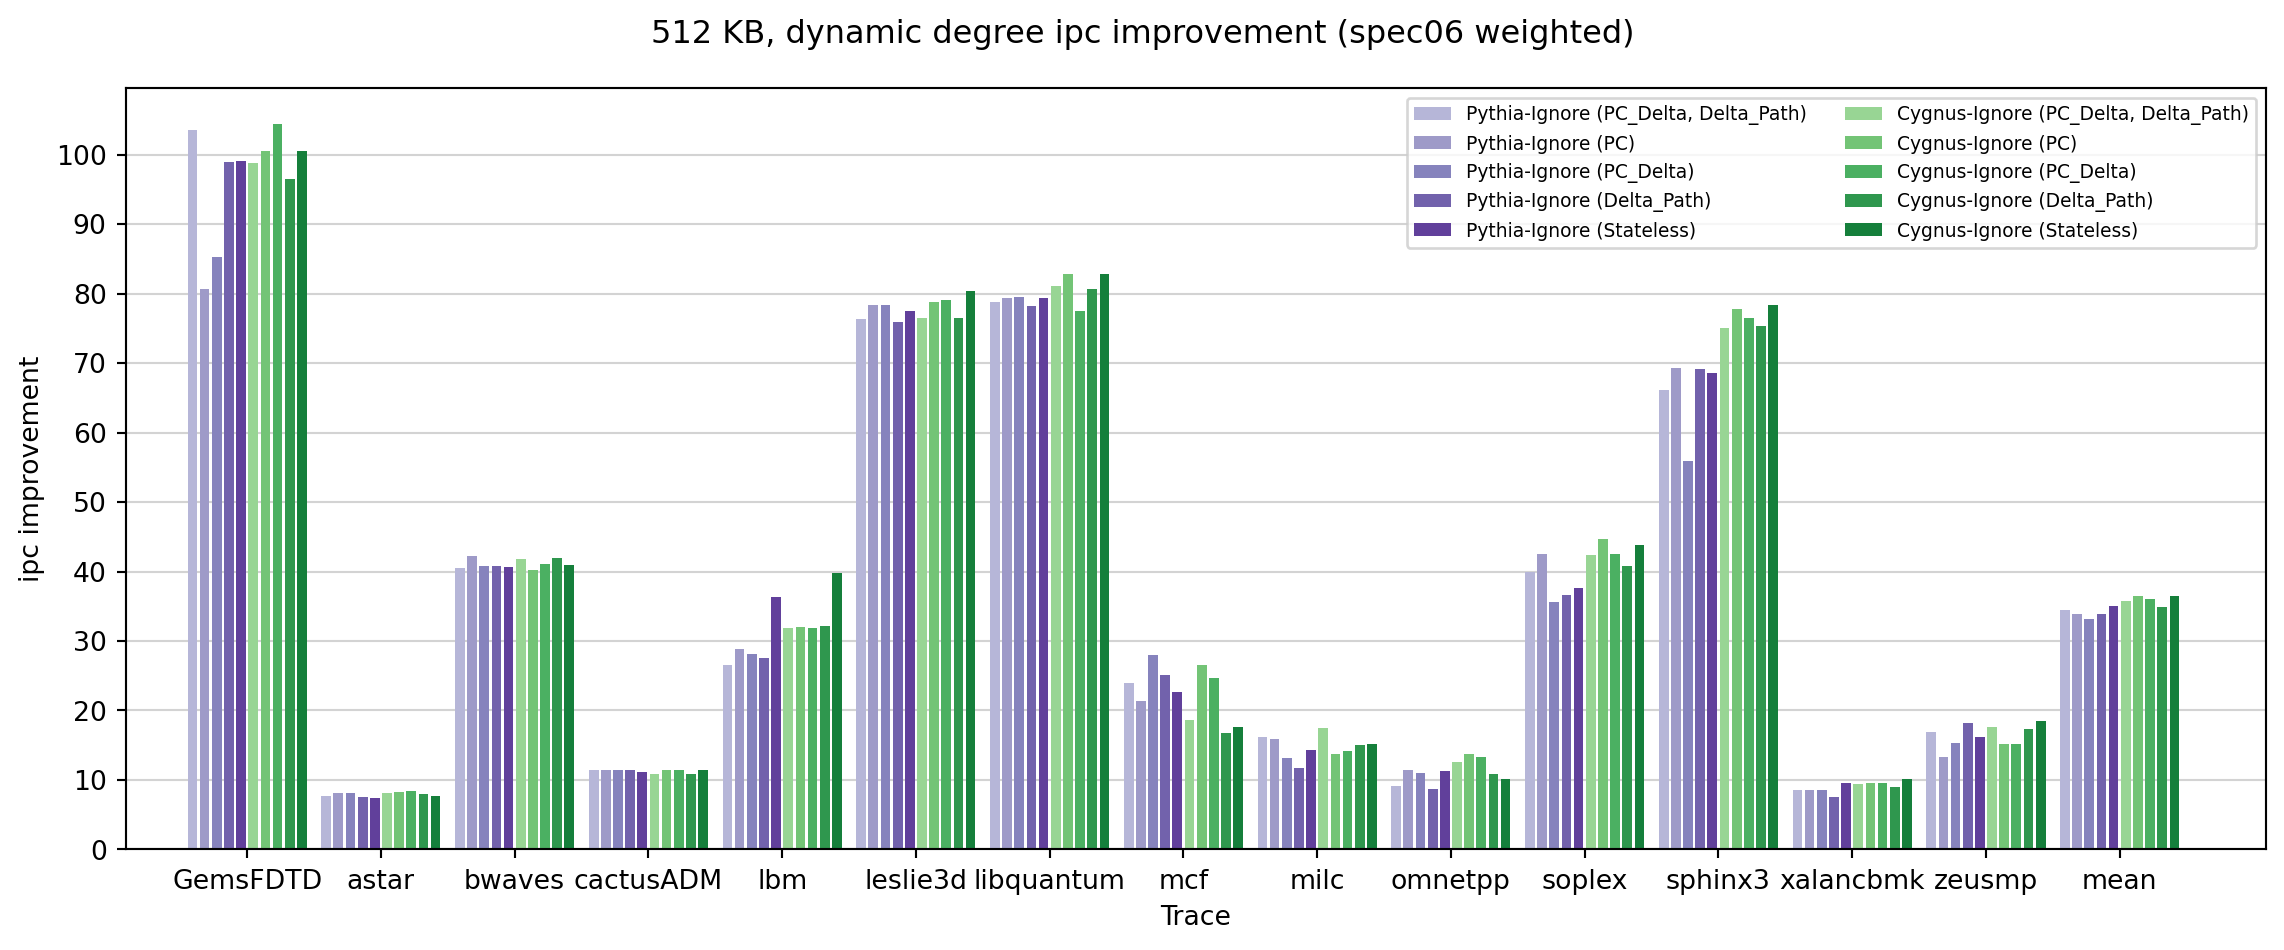

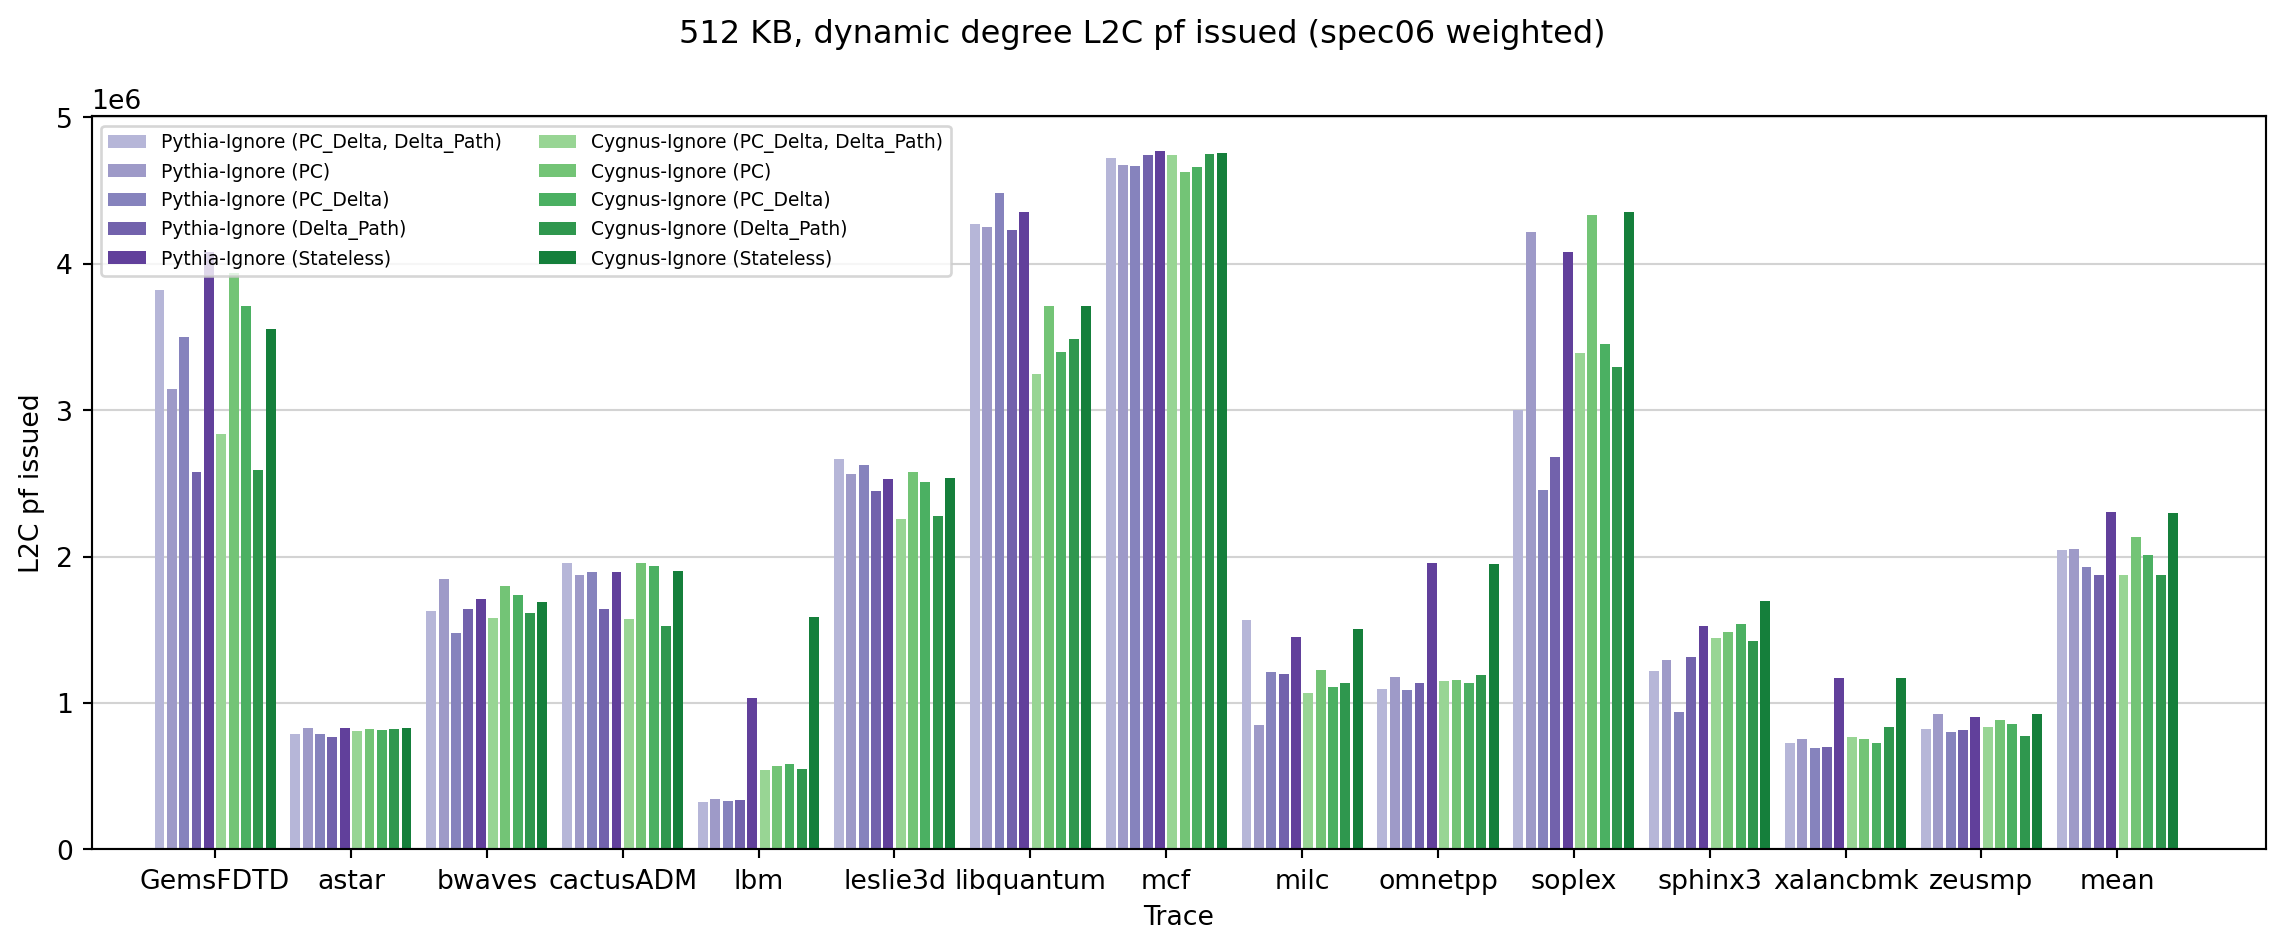

In [27]:
plots.plot_everything(ddyn_features_df, suites=suites, metrics=metrics, colors=ddyn_features_colors,
                      legend_kwargs=legend_kwargs, dpi=192, figsize=(12,5),
                      suptitle='512 KB, dynamic degree')

### Pythia-like Bythio

=== spec06 weighted ===


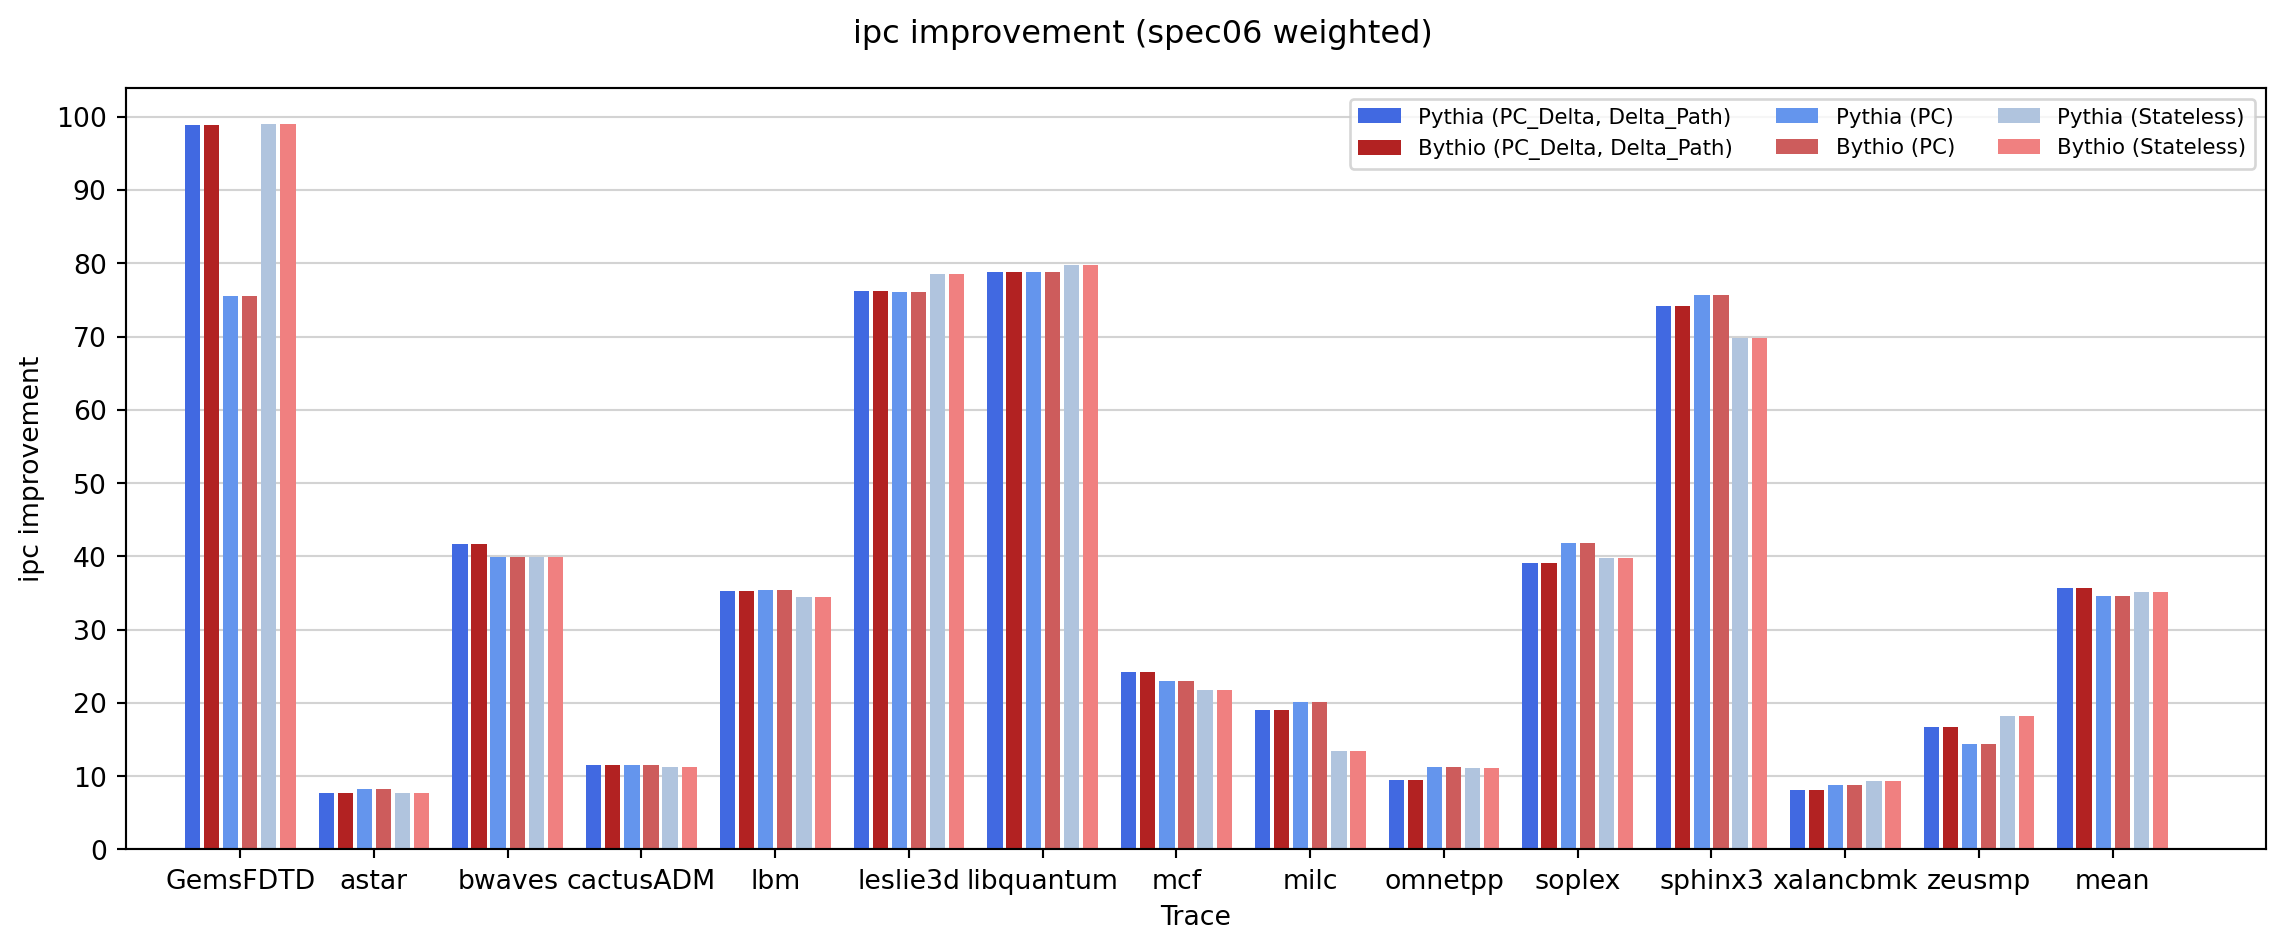

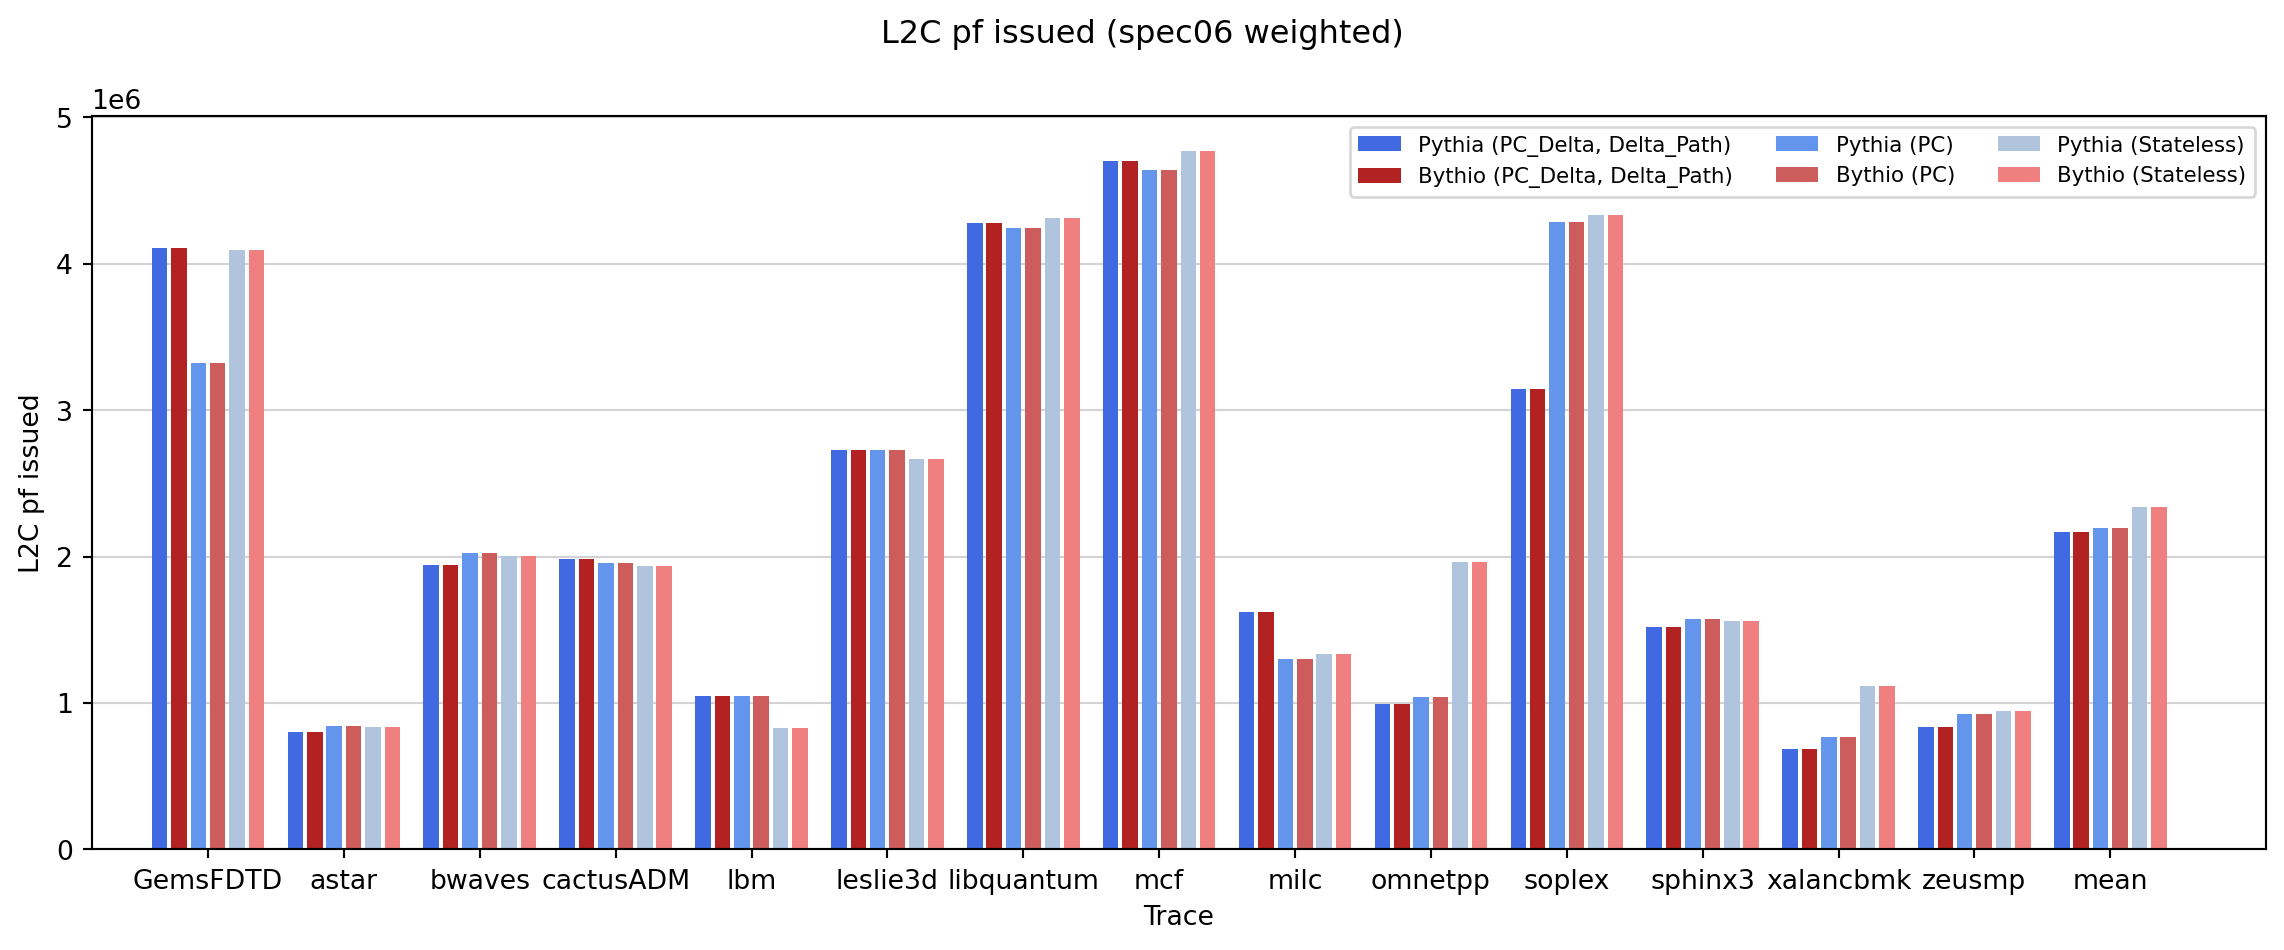

In [6]:
ddyn_pythialike_df = {
    'Pythia (PC_Delta, Delta_Path)': dfs['degreedyn/pythia/nozeroaction']['Delta_Path, PC_Delta'],
    'Bythio (PC_Delta, Delta_Path)': dfs['degreedyn/bythio/nozeroaction_pythialike']['Delta_Path, PC_Delta'],
    'Pythia (PC)': dfs['degreedyn/pythia/nozeroaction']['PC'],
    'Bythio (PC)': dfs['degreedyn/bythio/nozeroaction_pythialike']['PC'],
    'Pythia (Stateless)': dfs['degreedyn/pythia/nozeroaction']['Global'],
    'Bythio (Stateless)': dfs['degreedyn/bythio/nozeroaction_pythialike']['Global'],
}

ddyn_pythialike_df_colors = {
    'Pythia (PC_Delta, Delta_Path)': 'royalblue',
    'Bythio (PC_Delta, Delta_Path)': 'firebrick',
    'Pythia (PC)': 'cornflowerblue',
    'Bythio (PC)': 'indianred',
    'Pythia (Stateless)': 'lightsteelblue',
    'Bythio (Stateless)': 'lightcoral',
}

legend_kwargs = {
    'ncol': 3,
    'fontsize': 8,
}

plots.plot_everything(ddyn_pythialike_df, suites=suites, metrics=metrics, colors=ddyn_pythialike_df_colors,
                      legend_kwargs=legend_kwargs, dpi=192, figsize=(12,5))

# Tables

## Degree-1
### Baselines

In [ ]:
tables.table_everything(baseline_df, suites=suites, metrics=metrics)

### Fair baselines

In [ ]:
reload(tables)
tables.table_everything(fair_baseline_df, suites=suites, metrics=metrics)

### Features

In [14]:
reload(tables)
tables.table_everything(features_df, suites=suites, metrics=metrics)

=== spec06 weighted ===
ipc_improvement


,"Pythia (PC_Delta, Delta_Path)","Pythia-Ignore (PC_Delta, Delta_Path)",Bythio-Ignore (PC),Bythio (PC)
run_name,,,,
GemsFDTD_weighted,98.884459,103.597182,100.499310,96.674353
astar_weighted,7.640089,7.718616,8.276850,8.236481
bwaves_weighted,41.710011,40.509992,40.176931,39.490576
cactusADM_weighted,11.479364,11.473890,11.452478,11.403032
lbm_weighted,35.265506,26.551081,31.954189,12.102587
leslie3d_weighted,76.160892,76.276126,78.788395,77.648647
libquantum_weighted,78.746652,78.821559,82.803482,83.288260
mcf_weighted,24.209424,23.938713,26.518114,26.473932
milc_weighted,19.062668,16.253666,13.750222,15.882169


L2C_pf_issued


,"Pythia (PC_Delta, Delta_Path)","Pythia-Ignore (PC_Delta, Delta_Path)",Bythio-Ignore (PC),Bythio (PC)
run_name,,,,
GemsFDTD_weighted,4.104791e+06,3.819370e+06,3.936547e+06,4.020044e+06
astar_weighted,8.022440e+05,7.891830e+05,8.244748e+05,8.223929e+05
bwaves_weighted,1.944248e+06,1.626610e+06,1.801399e+06,1.767516e+06
cactusADM_weighted,1.986584e+06,1.955643e+06,1.958475e+06,1.977434e+06
lbm_weighted,1.051284e+06,3.273238e+05,5.698775e+05,3.730822e+05
leslie3d_weighted,2.729764e+06,2.667209e+06,2.579488e+06,2.564596e+06
libquantum_weighted,4.278250e+06,4.269878e+06,3.711955e+06,3.669590e+06
mcf_weighted,4.702003e+06,4.723912e+06,4.626501e+06,4.601975e+06
milc_weighted,1.621176e+06,1.565611e+06,1.227692e+06,1.057735e+06


### Registering demand fills

In [37]:
reload(tables)
tables.table_everything(fill_df, suites=suites, metrics=metrics)

=== spec06 weighted ===
ipc_improvement


,Pythia (PC) (*Prefetch),Pythia (PC) (Prefetch+Demand),Pythia-like Cygnus (PC) (*Prefetch),Pythia-like Cygnus (PC) (Prefetch+Demand),Cygnus (PC) (Prefetch),Cygnus (PC) (*Prefetch+Demand),Cygnus-Ignore (PC) (Prefetch),Cygnus-Ignore (PC) (*Prefetch+Demand)
run_name,,,,,,,,
GemsFDTD_weighted,60.103953,60.092873,60.103953,60.092873,68.440929,83.184305,71.525744,86.685097
astar_weighted,7.984100,8.130362,7.984100,8.130362,8.182709,8.219642,8.209962,8.244675
bwaves_weighted,28.339338,28.339338,28.339338,28.339338,28.940313,61.481794,58.045753,62.505403
cactusADM_weighted,11.251079,11.251346,11.251079,11.251346,11.292323,11.421406,11.340696,11.464385
lbm_weighted,21.208216,21.208216,21.208216,21.208216,21.098078,7.745898,28.385726,30.838800
leslie3d_weighted,41.509997,41.485544,41.509997,41.485544,42.112656,58.570463,43.145723,62.381702
libquantum_weighted,48.300387,48.300387,48.300387,48.300387,20.583202,73.501611,20.595856,73.521886
mcf_weighted,21.307673,20.406707,21.307673,20.406707,25.815289,25.812502,25.871541,25.894174
milc_weighted,12.868350,12.865585,12.868350,12.865585,9.402362,14.777374,10.925275,13.325819


L2C_pf_issued


,Pythia (PC) (*Prefetch),Pythia (PC) (Prefetch+Demand),Pythia-like Cygnus (PC) (*Prefetch),Pythia-like Cygnus (PC) (Prefetch+Demand),Cygnus (PC) (Prefetch),Cygnus (PC) (*Prefetch+Demand),Cygnus-Ignore (PC) (Prefetch),Cygnus-Ignore (PC) (*Prefetch+Demand)
run_name,,,,,,,,
GemsFDTD_weighted,8.559501e+05,8.559584e+05,8.559501e+05,8.559584e+05,9.421392e+05,8.988022e+05,9.421499e+05,9.108841e+05
astar_weighted,6.637780e+05,6.638177e+05,6.637780e+05,6.638177e+05,6.670868e+05,6.658520e+05,6.691835e+05,6.678432e+05
bwaves_weighted,6.868022e+05,6.868022e+05,6.868022e+05,6.868022e+05,6.873050e+05,6.605261e+05,6.855882e+05,6.778133e+05
cactusADM_weighted,4.142017e+05,4.141981e+05,4.142017e+05,4.141981e+05,4.147082e+05,4.109503e+05,4.169696e+05,4.136529e+05
lbm_weighted,2.806451e+05,2.806451e+05,2.806451e+05,2.806451e+05,2.800251e+05,2.135833e+05,3.387770e+05,3.169664e+05
leslie3d_weighted,6.408460e+05,6.408615e+05,6.408460e+05,6.408615e+05,6.421394e+05,5.979891e+05,6.431135e+05,6.121222e+05
libquantum_weighted,9.181498e+05,9.181498e+05,9.181498e+05,9.181498e+05,1.009850e+06,8.745842e+05,1.009853e+06,8.777987e+05
mcf_weighted,4.440645e+06,4.439099e+06,4.440645e+06,4.439099e+06,4.412205e+06,4.412268e+06,4.439187e+06,4.439132e+06
milc_weighted,4.913492e+05,4.913871e+05,4.913492e+05,4.913871e+05,5.259025e+05,4.621768e+05,5.695356e+05,5.548227e+05


### Sum-pooling features

In [104]:
reload(tables)
tables.table_everything(sumpool_df, suites=suites, metrics=metrics)

=== spec06 weighted ===
ipc_improvement


,"Cygnus-Ignore-Max (Delta_Path, PC_Delta)","Cygnus-Ignore-Sum (Delta_Path, PC_Delta)","Cygnus-Ignore-Max (PC, PC_Delta)","Cygnus-Ignore-Sum (PC, PC_Delta)","Cygnus-Ignore-Max (Global, PC, PC_Delta)","Cygnus-Ignore-Sum (Global, PC, PC_Delta)",Cygnus-Ignore (PC)
run_name,,,,,,,
GemsFDTD_weighted,82.015873,81.997834,85.194348,86.075016,85.139719,85.247123,86.685097
astar_weighted,8.097850,8.152905,8.382146,8.347024,7.862393,8.404322,8.244675
bwaves_weighted,57.535421,59.493968,62.181651,62.271243,62.132494,60.533506,62.505403
cactusADM_weighted,10.904070,11.295994,11.433301,11.442763,11.442824,11.445670,11.464385
lbm_weighted,33.661946,31.749826,31.143022,30.898119,31.150641,30.761092,30.838800
leslie3d_weighted,65.666248,61.980520,63.197108,62.697432,63.050737,61.881342,62.381702
libquantum_weighted,70.498177,72.638606,72.911142,73.553374,73.017464,73.540784,73.521886
mcf_weighted,17.994136,17.001050,24.547224,24.044876,17.145067,18.946076,25.894174
milc_weighted,16.723003,17.163617,18.787659,14.101158,14.863123,17.143745,13.325819


L2C_pf_issued


,"Cygnus-Ignore-Max (Delta_Path, PC_Delta)","Cygnus-Ignore-Sum (Delta_Path, PC_Delta)","Cygnus-Ignore-Max (PC, PC_Delta)","Cygnus-Ignore-Sum (PC, PC_Delta)","Cygnus-Ignore-Max (Global, PC, PC_Delta)","Cygnus-Ignore-Sum (Global, PC, PC_Delta)",Cygnus-Ignore (PC)
run_name,,,,,,,
GemsFDTD_weighted,8.975394e+05,9.075210e+05,9.123504e+05,9.120281e+05,9.123294e+05,9.114106e+05,9.108841e+05
astar_weighted,6.691952e+05,6.734925e+05,6.677361e+05,6.726920e+05,6.773574e+05,6.731700e+05,6.678432e+05
bwaves_weighted,6.693861e+05,6.742857e+05,6.770342e+05,6.775820e+05,6.773165e+05,6.763213e+05,6.778133e+05
cactusADM_weighted,4.084721e+05,4.118778e+05,4.132462e+05,4.137387e+05,4.133859e+05,4.137546e+05,4.136529e+05
lbm_weighted,3.107202e+05,3.147018e+05,3.150503e+05,3.156337e+05,3.155408e+05,3.166547e+05,3.169664e+05
leslie3d_weighted,6.088137e+05,6.141157e+05,6.117095e+05,6.122998e+05,6.117972e+05,6.135156e+05,6.121222e+05
libquantum_weighted,8.748562e+05,8.780692e+05,8.775231e+05,8.788391e+05,8.775297e+05,8.785370e+05,8.777987e+05
mcf_weighted,4.456790e+06,4.463742e+06,4.444201e+06,4.446841e+06,4.460763e+06,4.458658e+06,4.439132e+06
milc_weighted,6.028836e+05,6.021314e+05,5.490516e+05,5.516862e+05,5.871137e+05,5.445555e+05,5.548227e+05


### Pythia-like Bythio

In [ ]:
reload(tables)
tables.table_everything(pythialike_df, suites=suites, metrics=metrics)

## Dynamic degree

### Fair baselines

In [ ]:
reload(tables)
tables.table_everything(ddyn_fair_baseline_df, suites=suites, metrics=metrics)

### Pythia-like Bythio

In [ ]:
reload(tables)
tables.table_everything(ddyn_pythialike_df, suites=suites, metrics=metrics)